# BEHINDE THE CRIMES: A Detailed Dive into Denmark's Criminal Landscape
**02806 Social data analysis and visualization Spring 24**

**Group members:** 
- Sölvi Björnsson s232722 
- Þórir Lárusson s232715

**Supervisor:** 
- Sune Lehmann

---



# Table of Contents
* [Introduction](#introduction)
    * [Motivation](#motivation)
    * [Basic stats](#basic_stats)
* [Data Analysis](#data_analysis)
* [Genre](#genre)
* [Visualizations](#visualizations)
* [Discussion](#discussion)
* [Contributions](#contributions)



___

In [125]:
import pandas as pd
import numpy as np
import plotly.express as px
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import combinations
from io import StringIO

from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook

import folium
import json


/Users/thorirlarusson/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning:

urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



<a id="introduction"></a> 
# Introduction
In this notebook, we'll delve into the dynamics of crime in Denmark using a couple of datasets. Firstly, we'll examine the crime rates across different regions, followed by an analysis of population demographics to understand the disparities. Here's the link to the data we've [source](https://www.statbank.dk/10059.)

<a id="motivation"></a> 
### Motivation
Since we've recently relocated to Denmark and have been studying the SF crime data this semester, exploring the crime landscape in Denmark seems like an intriguing idea. Our approach begins with pinpointing areas with the highest crime rates to gain a comprehensive understanding. Subsequently, we'll conduct a thorough investigation to uncover the underlying reasons behind these patterns. This includes examining socio-economic factors, demographic data, and urban versus rural distributions that may influence crime rates.

Moreover, our analysis will not only focus on internal comparisons within Denmark but also extend to an international framework. We aim to compare Denmark's crime rates with those of other countries to put the Danish crime landscape into perspective. This comparative insight is particularly relevant as it helps us understand how Denmark stacks up against its international counterparts in terms of safety and public security.

Additionally, we will delve into how crime rates correlate with the population's country of origin within Denmark. By exploring this dimension, we hope to identify any trends or significant factors that might explain variations in crime rates among different demographic groups. Integrating population statistics, especially focusing on the country of origin, will enrich our analysis and ensure that the conclusions drawn are well-rounded and robust.

<a id="basic_stats"></a> 
### Basic Stats 
Our datasets, primarily statistical records from Denmark, are inherently reliable with minimal errors. However, due to the limit of handling only 100,000 records per dataset, we had to amalgamate multiple datasets to ensure comprehensive coverage of the timeframe and variables of interest. This involved selectively merging data across different years and categories, including crime rates, population statistics, and demographic details.

#### Data Cleaning Details
1. **Header Insertion**: Initially, some of our datasets lacked proper headers, which are crucial for data manipulation and readability in pandas DataFrames. We manually added headers to these CSV files to align them with the required format for analysis.

2. **Variable Selection and Removal**:
    - After a preliminary review, we identified several variables that were not relevant to our analysis goals. These variables were promptly excluded to streamline the datasets.
    - This selection process was applied consistently across all datasets, ensuring that only pertinent data was retained for analysis.

3. **Handling Multiple CSV Files**:
    - Due to the 100,000 record limit per CSV, our data was fragmented across multiple files. We developed a methodical approach to concatenate these files systematically, ensuring data continuity and integrity.
    - This involved checking for overlap and inconsistencies between batches of data as they were merged.

4. **Geospatial Data Integration**:
    - To enhance our analysis with spatial context, we incorporated geoJSON data for Danish municipalities. This allows us to perform more detailed geographic analyses and visualizations.
    - The geoJSON data was sourced from a reliable repository, which can be accessed [here](https://github.com/magnuslarsen/geoJSON-Danish-municipalities).

#### Basic Statistical Overview
After cleaning and structuring our data, we conducted a basic statistical analysis to understand the distribution and general trends within the data. This included calculating means, medians, and identifying any significant outliers that could influence further analyses.








<a id="data_analysis"></a> 
# Data Analysis

## Crime in Denmark 
Denmark is known as one of the [safest countries](https://studyindenmark.dk/news/copenhagen-ranks-highest-in-the-safe-cities-index-2021#:~:text=A%20new%20report%20by%20the,82.4%20points%20out%20of%20100.) in the world, praised for its peaceful cities and high levels of security. However, even in such a safe place, there's still some crime happening. Let's take a closer look at the crime situation in Denmark to understand how safety and crime can coexist. In this dataset we have all the data about reported criminal offences.

In [85]:
crime_data_region = "../crimes/Crimes_from_2014_2023.csv"

crime_data = pd.read_csv((crime_data_region), delimiter=';')
# Lets filter out the rows where the total offence is 
crime_data.head()

Reported criminal offences                       offence  \
0  Reported criminal offences  Nature of the offence, total   
1  Reported criminal offences  Nature of the offence, total   
2  Reported criminal offences  Nature of the offence, total   
3  Reported criminal offences  Nature of the offence, total   
4  Reported criminal offences  Nature of the offence, total   

               region    2014    2015    2016    2017    2018    2019    2020  \
0         All Denmark  518963  501881  516576  520270  507824  498849  444428   
1  Region Hovedstaden  209536  203995  214322  200573  189236  192709  164550   
2          Copenhagen  102004   98887  108000   97962   92898   99855   81987   
3       Frederiksberg    9630    9071    8747    9096    7502    7733    7440   
4              Drag�r     527     611     612     666     533     699     644   

     2021    2022    2023  
0  413181  473306  477617  
1  151447  178784  187474  
2   75575   86578   93437  
3    7185    8220    8091  
4     535     535     618

In [86]:
crime_data_df = crime_data.drop('Reported criminal offences', axis=1)
crime_data_df.head()

offence              region    2014    2015    2016  \
0  Nature of the offence, total         All Denmark  518963  501881  516576   
1  Nature of the offence, total  Region Hovedstaden  209536  203995  214322   
2  Nature of the offence, total          Copenhagen  102004   98887  108000   
3  Nature of the offence, total       Frederiksberg    9630    9071    8747   
4  Nature of the offence, total              Drag�r     527     611     612   

     2017    2018    2019    2020    2021    2022    2023  
0  520270  507824  498849  444428  413181  473306  477617  
1  200573  189236  192709  164550  151447  178784  187474  
2   97962   92898   99855   81987   75575   86578   93437  
3    9096    7502    7733    7440    7185    8220    8091  
4     666     533     699     644     535     535     618

In [87]:
crime_data_df = pd.melt(crime_data_df, id_vars=['offence', 'region'], var_name='Year', value_name='crime_count')

# Convert the 'Year' column to numeric
crime_data_df['Year'] = pd.to_numeric(crime_data_df['Year'])

crime_data_df

offence                region  Year  \
0          Nature of the offence, total           All Denmark  2014   
1          Nature of the offence, total    Region Hovedstaden  2014   
2          Nature of the offence, total            Copenhagen  2014   
3          Nature of the offence, total         Frederiksberg  2014   
4          Nature of the offence, total                Drag�r  2014   
...                                 ...                   ...   ...   
96455  Special legislation, unspecified                Rebild  2023   
96456  Special legislation, unspecified               Thisted  2023   
96457  Special legislation, unspecified       Vesthimmerlands  2023   
96458  Special legislation, unspecified               Aalborg  2023   
96459  Special legislation, unspecified  Unknown municipality  2023   

       crime_count  
0           518963  
1           209536  
2           102004  
3             9630  
4              527  
...            ...  
96455            0  
96456            0  
96457            0  
96458            0  
96459            0  

[96460 rows x 4 columns]

As there some words in denmark our visual studio code doesn't want to display, e.g. Br�ndby = Brøndby, lets fix that using regex

In [76]:
import re

def replace_corrupted_characters(city_name):
    # Replacement patterns for corrupted Danish characters
    patterns = {
        r'Drag�r': 'Dragør',
        r'T�rnby': 'Tårnby',
        r'Br�ndby': 'Brøndby',
        r'H�je-Taastrup': 'Høje-Taastrup',
        r'Ish�j': 'Ishøj',
        r'Lyngby-Taarb�k': 'Lyngby-Taarbæk',
        r'R�dovre': 'Rødovre',
        r'Vallensb�k': 'Vallensbæk',
        r'Aller�d': 'Allerød',
        r'Fures�': 'Furesø',
        r'Halsn�s': 'Halsnæs',
        r'Helsing�r': 'Helsingør',
        r'Hiller�d': 'Hillerød',
        r'H�rsholm': 'Hørsholm',
        r'Christians�': 'Christiansø',
        r'Region Sj�lland': 'Region Sjælland',
        r'K�ge': 'Køge',
        r'Solr�d': 'Solrød',
        r'N�stved': 'Næstved',
        r'�r�': 'Ærø',
        r'S�nderborg': 'Sønderborg',
        r'T�nder': 'Tønder',
        r'Ringk�bing-Skjern': 'Ringkøbing-Skjern',
        r'Br�nderslev': 'Brønderslev-Dronninglund',
        r'Hj�rring': 'Hjørring',
        r'L�s�': 'Læsø',
        r'Mors�': 'Morsø',
        r'Fan�' : 'Fanø',
        r'Holb�k':'Holbæk',
        r'Sams�':'Samsø',
        r'Sor�':'Sorø',
        r'Aarhus':'Århus',
        r'Vesthimmerlands':"Vesthimmerland"

    }

    # Replace each pattern in the string
    for pattern, replacement in patterns.items():
        city_name = re.sub(pattern, replacement, city_name)

    return city_name


In [88]:
# Regex:
crime_data_df['region'] = crime_data_df['region'].apply(replace_corrupted_characters)
crime_data_df

offence                region  Year  \
0          Nature of the offence, total           All Denmark  2014   
1          Nature of the offence, total    Region Hovedstaden  2014   
2          Nature of the offence, total            Copenhagen  2014   
3          Nature of the offence, total         Frederiksberg  2014   
4          Nature of the offence, total                Dragør  2014   
...                                 ...                   ...   ...   
96455  Special legislation, unspecified                Rebild  2023   
96456  Special legislation, unspecified               Thisted  2023   
96457  Special legislation, unspecified        Vesthimmerland  2023   
96458  Special legislation, unspecified               Aalborg  2023   
96459  Special legislation, unspecified  Unknown municipality  2023   

       crime_count  
0           518963  
1           209536  
2           102004  
3             9630  
4              527  
...            ...  
96455            0  
96456            0  
96457            0  
96458            0  
96459            0  

[96460 rows x 4 columns]

Lets take all the region out and all of denmark

In [89]:
crime_data_df = crime_data_df[~crime_data_df['region'].str.contains("Region")]
crime_data_df = crime_data_df[crime_data_df['region'] != 'All Denmark']

crime_data_df

offence                region  Year  \
2          Nature of the offence, total            Copenhagen  2014   
3          Nature of the offence, total         Frederiksberg  2014   
4          Nature of the offence, total                Dragør  2014   
5          Nature of the offence, total                Tårnby  2014   
6          Nature of the offence, total           Albertslund  2014   
...                                 ...                   ...   ...   
96455  Special legislation, unspecified                Rebild  2023   
96456  Special legislation, unspecified               Thisted  2023   
96457  Special legislation, unspecified        Vesthimmerland  2023   
96458  Special legislation, unspecified               Aalborg  2023   
96459  Special legislation, unspecified  Unknown municipality  2023   

       crime_count  
2           102004  
3             9630  
4              527  
5             7776  
6             2816  
...            ...  
96455            0  
96456            0  
96457            0  
96458            0  
96459            0  

[91000 rows x 4 columns]

### Timeseries
As we have now prepared our dataset let us start making some visualizations and do some timeseries for the crime

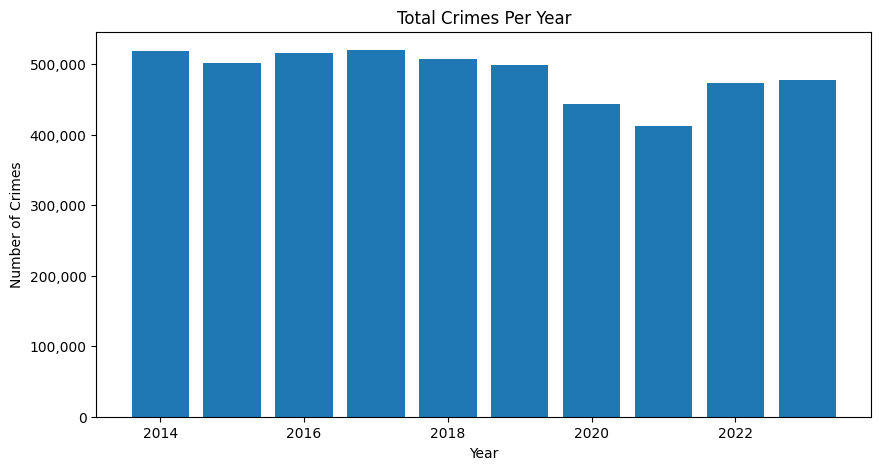

In [92]:
# Filter rows where the 'offence' is "Nature of the offence, total"
total_offence_df = crime_data_df[crime_data_df['offence'] == "Nature of the offence, total"]

# Assuming total_crimes_per_year is already defined with 'Year' and 'crime_count'
total_crimes_per_year = total_offence_df.groupby('Year')['crime_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(total_crimes_per_year['Year'], total_crimes_per_year['crime_count'])
plt.title('Total Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Adjust the y-axis to display numbers in plain format, not scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

As we can see from the graph the crime count is pretty stable but as gone done from the past couple of years. Now lets the different crime types

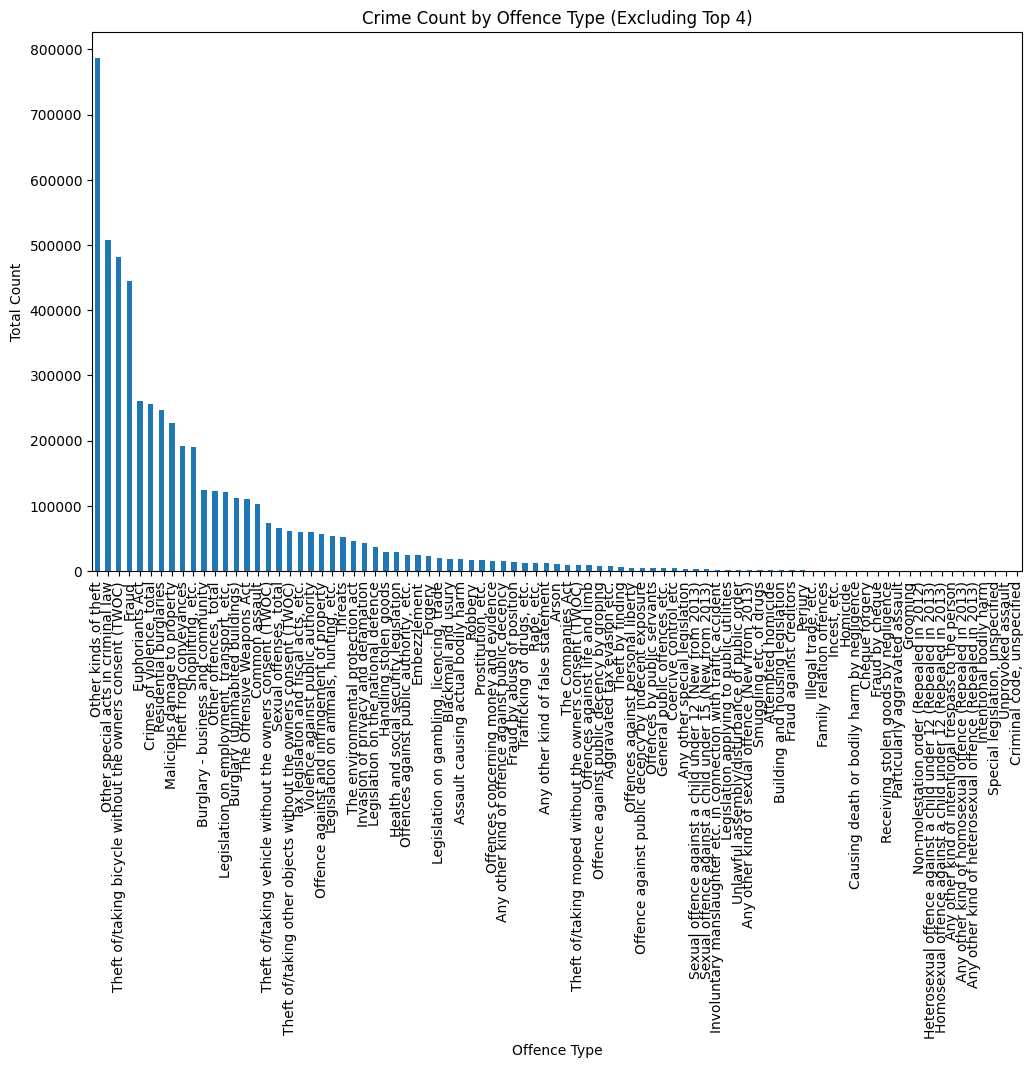

In [99]:


# Summing the counts by offence type and sort them in descending order
crimes_by_type = crime_data_df.groupby('offence')['crime_count'].sum().sort_values(ascending=False)

# Exclude the first four offense types by using iloc on the sorted Series
filtered_crimes_by_type = crimes_by_type.iloc[4:]

# Plotting the filtered data
plt.figure(figsize=(12, 7))
filtered_crimes_by_type.plot(kind='bar')  # Ensure you are plotting the filtered series
plt.title('Crime Count by Offence Type (Excluding Top 4)')
plt.xlabel('Offence Type')
plt.ylabel('Total Count')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.show()


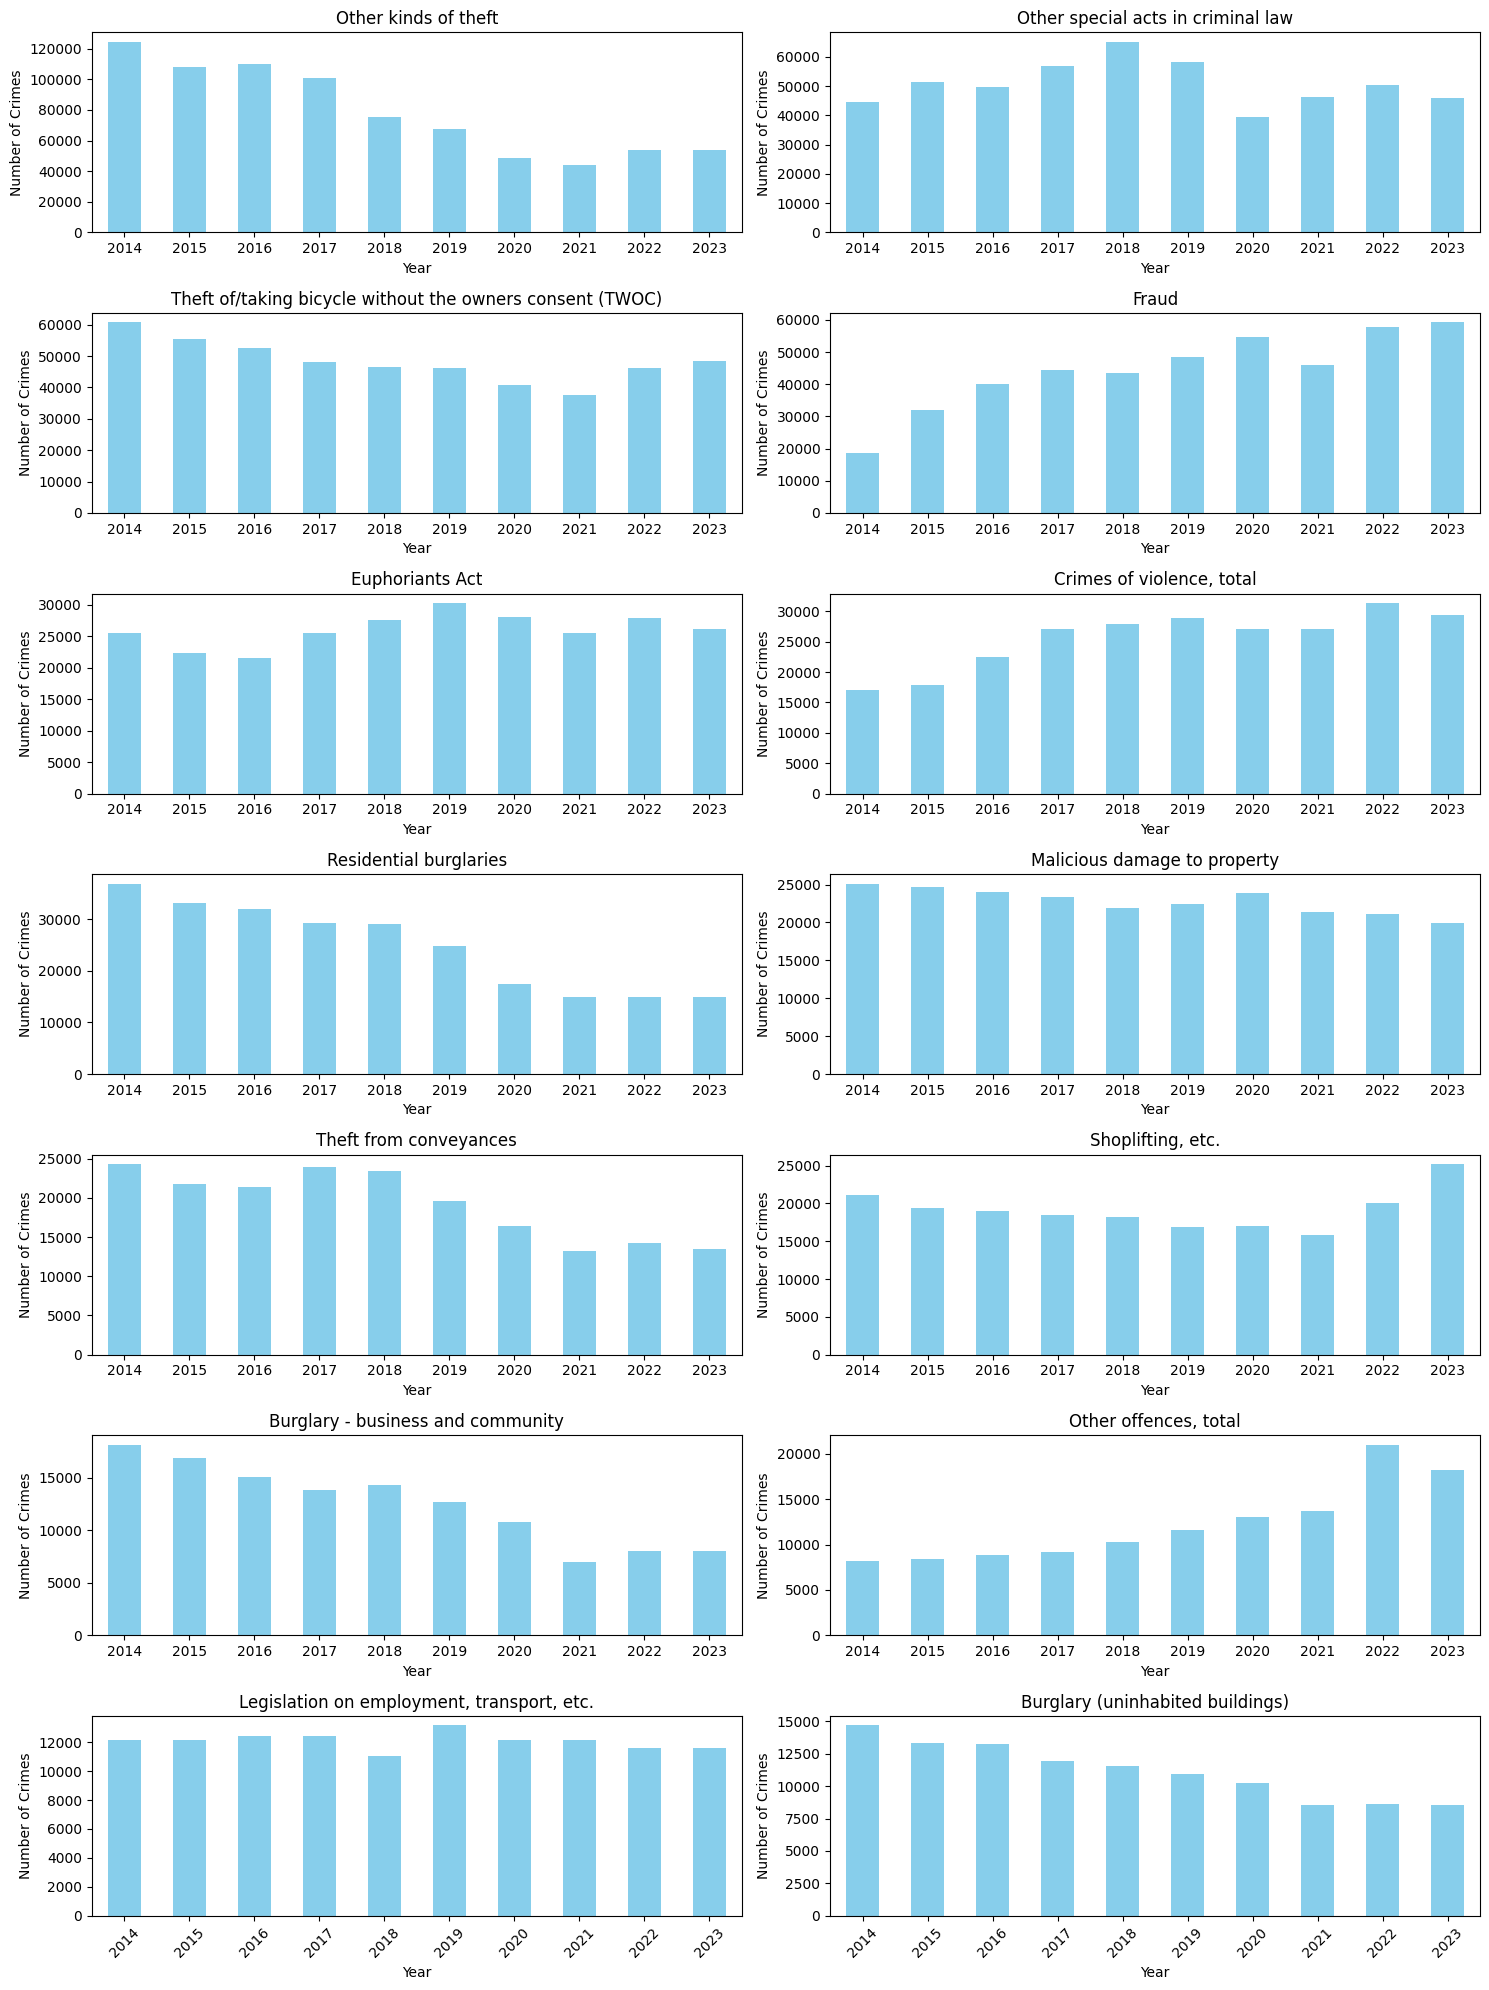

In [102]:



# Get the top 14 largest crime categories
focus_crimes = filtered_crimes_by_type.nlargest(14).index.tolist()

# Create a 7x2 subplot grid
fig, axs = plt.subplots(7, 2, figsize=(15, 20))
axs = axs.flatten()  # Flatten the array of axes

# Loop over each focus crime and plot it in a subplot
for i, focus_crime in enumerate(focus_crimes):
    # Filter data for the specific crime
    focus_crime_data = crime_data_df[crime_data_df['offence'] == focus_crime]
    
    # Group by year and sum the counts
    yearly_focus_crime_counts = focus_crime_data.groupby('Year')['crime_count'].sum()

    # Plotting
    yearly_focus_crime_counts.plot(kind='bar', ax=axs[i], color='skyblue')  # Use a consistent color or vary by your choice
    axs[i].set_title(f'{focus_crime}')
    axs[i].set_ylabel('Number of Crimes')
    axs[i].set_xlabel('Year')

    # Improve the tick label appearance
    axs[i].tick_params(axis='x', rotation=45 if i >= (7 - 1) * 2 else 0)  # Only rotate on the last row

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


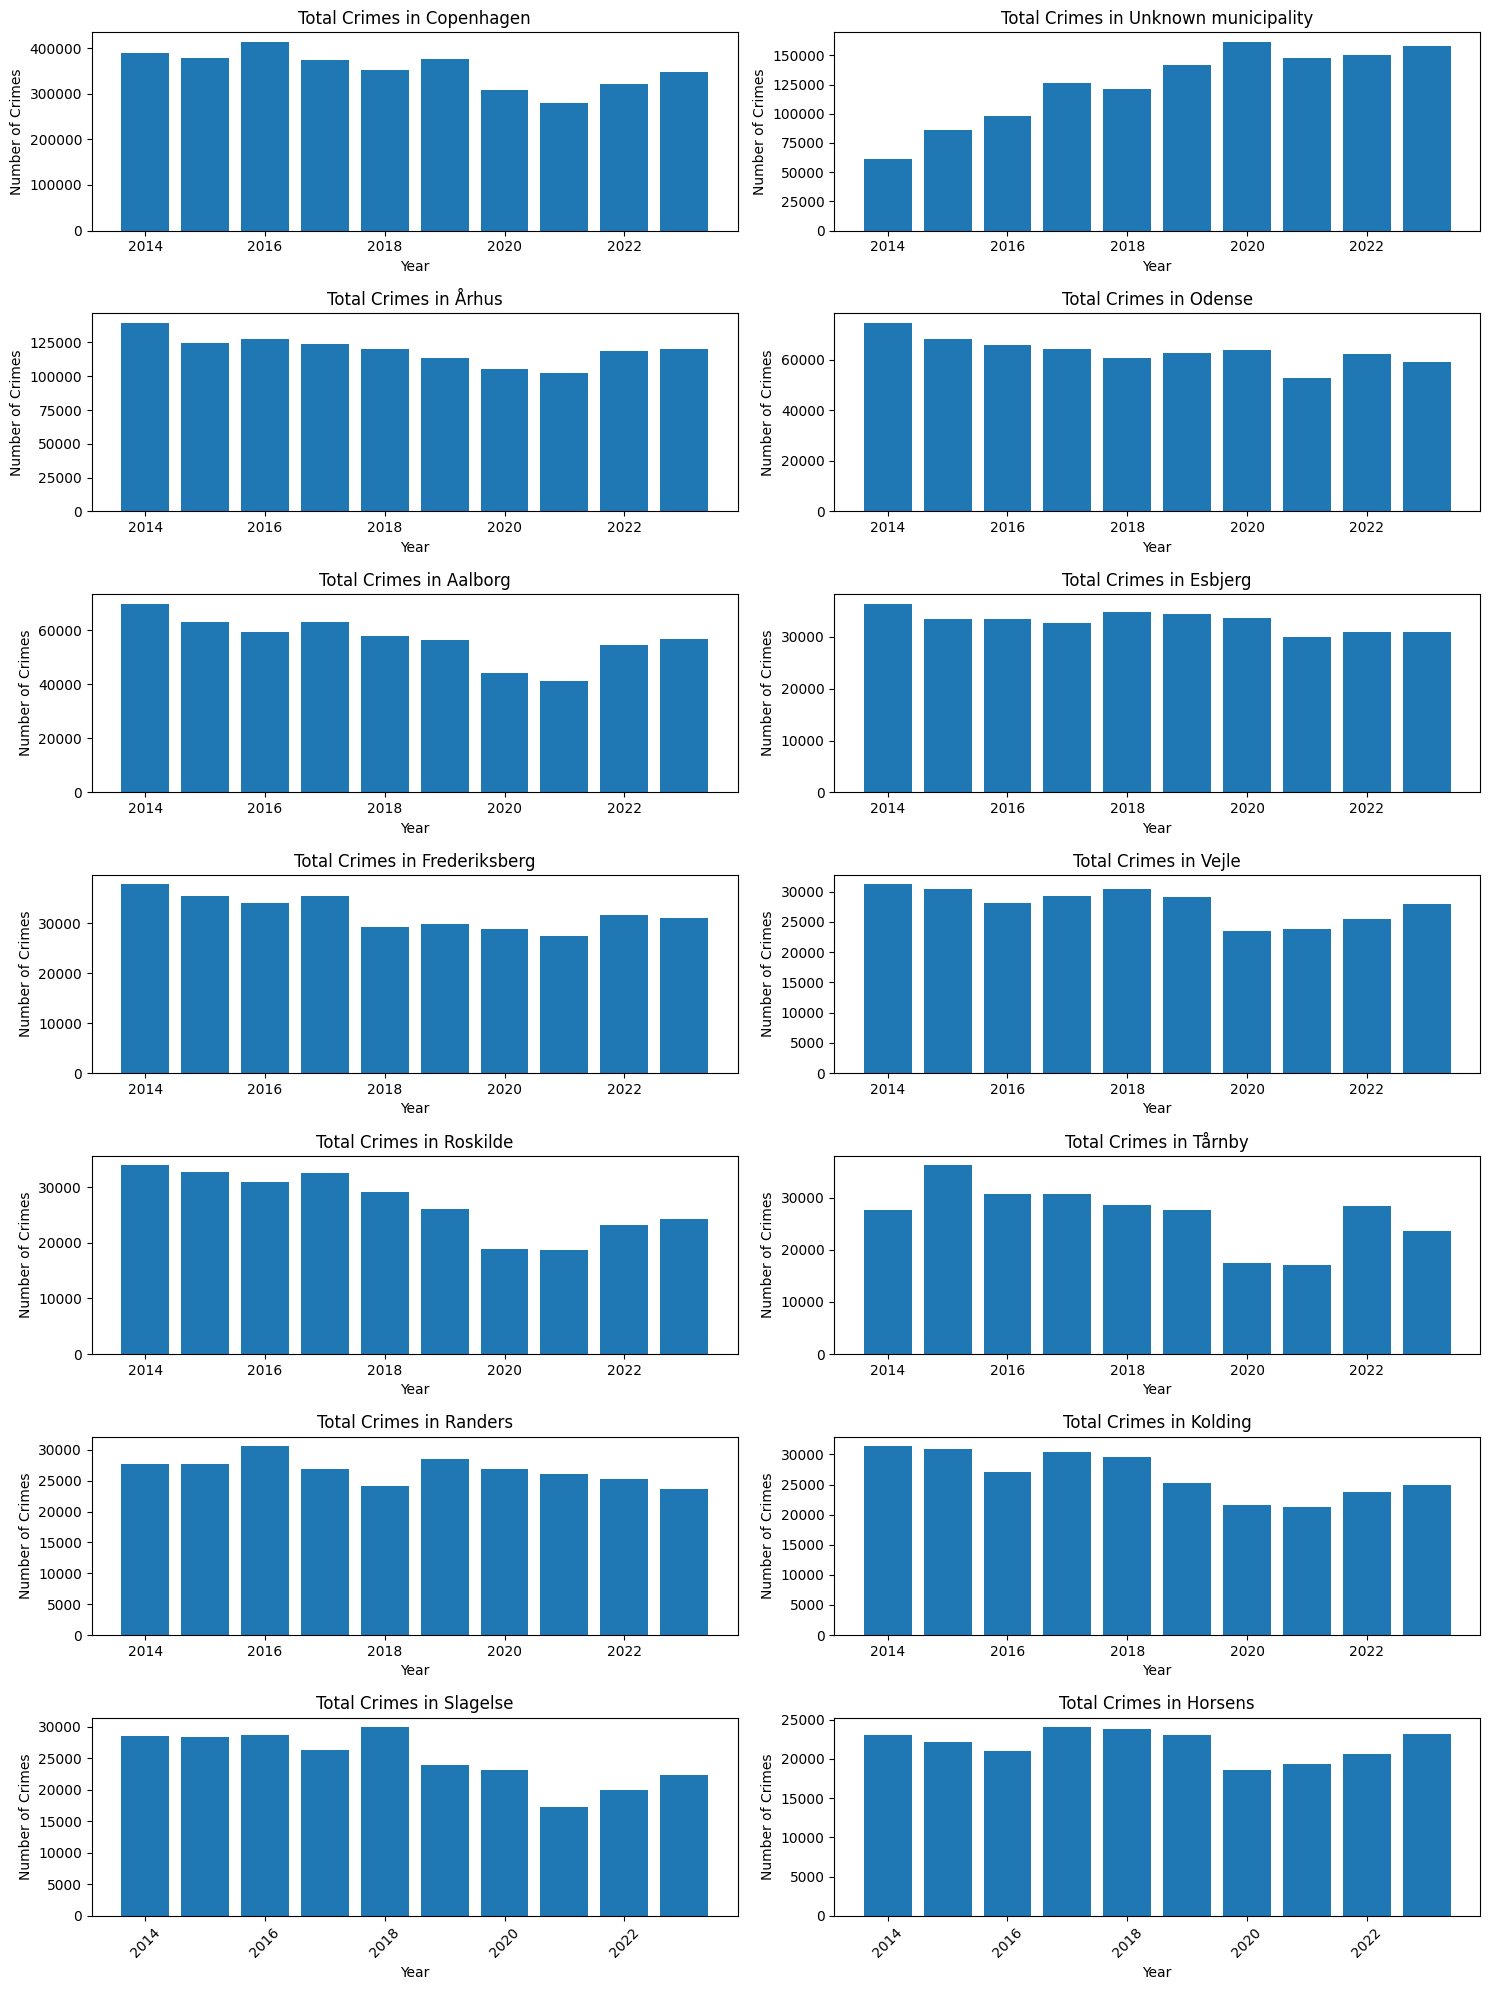

In [95]:

# Determine the top 14 regions by total crime count
top_regions = crime_data_df.groupby('region')['crime_count'].sum().nlargest(14).index.tolist()

# Create a 7x2 subplot grid
fig, axs = plt.subplots(7, 2, figsize=(15, 20))
axs = axs.flatten()  # Flatten the array of axes

# Loop over each top region and plot its data in a subplot
for i, region in enumerate(top_regions):
    # Filter data for the specific region
    regional_crime_data = crime_data_df[crime_data_df['region'] == region]
    
    # Group by year and sum the counts
    yearly_regional_crime_counts = regional_crime_data.groupby('Year')['crime_count'].sum()

    # Plotting
    axs[i].bar(yearly_regional_crime_counts.index, yearly_regional_crime_counts.values)
    axs[i].set_title(f'Total Crimes in {region}')
    axs[i].set_ylabel('Number of Crimes')
    axs[i].set_xlabel('Year')

    # Improve the tick label appearance
    axs[i].tick_params(axis='x', rotation=45 if i >= (7 - 1) * 2 else 0)  # Only rotate on the last row

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Next we are going to look into the crimes by region and to get better feel on how the criminal activity is we are going to show the crime per population

In [104]:
data_df = pd.read_csv("../data/reg_crime_ratio.csv")
data_df

region  Population 24  Total_crimes_2023  Crime/Population
0         Aabenraa          58657               4260          0.072626
1          Aalborg         223174              15350          0.068780
2            Århus         367095              31751          0.086493
3              Ærø           5960                169          0.028356
4      Albertslund          27677               2572          0.092929
..             ...            ...                ...               ...
94           Vejen          42800               1819          0.042500
95           Vejle         121696               7511          0.061719
96  Vesthimmerland          36012               2489          0.069116
97          Viborg          97472               5510          0.056529
98     Vordingborg          45751               2476          0.054119

[99 rows x 4 columns]

In [82]:
# Load the GeoJSON
geojson_file_path = '../data/combined_municipalities.geojson'  # Update this to the path to your GeoJSON file
with open(geojson_file_path) as file:
    municipalities_geojson = json.load(file)

In [105]:
# Create the choropleth map
fig = px.choropleth_mapbox(data_df,
                           geojson=municipalities_geojson,
                           locations='region',
                           color='Crime/Population',
                           color_continuous_scale="Viridis",
                           featureidkey="properties.label_en",
                           mapbox_style="carto-positron",
                           zoom=6,  # Adjust as necessary
                           #center={"lat": 55.6761, "lon": 12.5683},  # Center on Copenhagen
                           center={"lat": 56.2639, "lon": 9.5018},
                           opacity=0.5,
                           #labels={'2024': 'Population'}
                          )

# Update the layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()

From the map, it is evident that Copenhagen exhibits a higher crime ratio compared to surrounding regions. This trend is typical for urban centers and can be attributed to factors such as high population densities, significant economic activities, and increased incident reporting

# Comparison Among the Nordic Countires
In this section, our aim is to examine the variations in crime rates across the Nordic countries. We'll focus on total offenses per population within each country. This analysis will allow us to evaluate Denmark's performance relative to its Nordic counterparts. Given the reputation of the Nordic countries for safety, it's intriguing to observe how they stack up against each other.

### Data collection
**Sweden**  
For data on total offences in Sweden, we sourced information from the [Swedish National Council for Crime Prevention](https://bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences). Population metrics for Sweden were obtained from [Statistics Sweden](https://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/pong/tables-and-graphs/population-statistics---summary/swedens-population-in-summary-1960-2023/).

In [ ]:
pop_sweden = pd.read_excel("../countries/pop_sweden.xlsx", header=4, nrows=1)  


# Remove columns that are completely empty (all NaN values)
pop_sweden.dropna(axis=1, how='all', inplace=True)
pop_sweden.columns = [col.strip() for col in pop_sweden.columns.astype(str)]

# Melt the DataFrame to reshape it to a 'Year' and 'Population' format
pop_sweden = pop_sweden.melt(var_name='Year', value_name='sweden_population')

# Convert 'Year' to integer and 'Population' to integer
pop_sweden['Year'] = pop_sweden['Year'].astype(int)
pop_sweden['sweden_population'] = pop_sweden['sweden_population'].astype(int)

# Sort the DataFrame by the 'Year' column in ascending order
pop_sweden = pop_sweden.sort_values(by='Year', ascending=True)


pop_sweden = pop_sweden.reset_index(drop=True)

offences_sweden = pd.read_excel("../countries/total_offences_sweden.xlsx")
# Rename the header
offences_sweden =offences_sweden.rename(columns={'Total_offences': 'sweden_offences'})


**Norway**  
Total offences data for Norway was acquired from [Statistics Norway](https://www.ssb.no/en/sosiale-forhold-og-kriminalitet/kriminalitet-og-rettsvesen/statistikk/anmeldte-lovbrudd-og-ofre). Population statistics for Norway were obtained from [Statistics Norway](https://www.ssb.no/en/statbank/table/06913/tableViewLayout1/).


In [ ]:
pop_norway = pd.read_csv('../countries/pop_norway.csv', delimiter=';')
# Rename the header
pop_norway = pop_norway.rename(columns={'Population': 'norway_population'})

offences_norway = pd.read_csv('../countries/norway_offences.csv', delimiter=';')
# Rename the header
offences_norway = offences_norway.rename(columns={'offences': 'norway_offences'})

**Iceland**  
Population data for Iceland was retrieved from [Statistics Iceland](https://statice.is/stat-bank). Total offences information for Iceland was gathered from [Statistics Iceland](https://px.hagstofa.is/pxen/pxweb/en/Samfelag/Samfelag__domsmal__afbrot/DOM0501.px).

In [ ]:
pop_iceland = pd.read_csv("../countries/pop_iceland.csv", delimiter=';')

pop_iceland = pop_iceland.rename(columns={'Population': 'iceland_population'})

offences_iceland = pd.read_csv("../countries/offences_Iceland.csv", delimiter=';')

# Strip whitespace and remove quotes from the column names
offences_iceland.columns = offences_iceland.columns.str.strip().str.replace('"', '')

# Strip whitespace and remove quotes from all string entries in the DataFrame
for col in offences_iceland.select_dtypes(include=['object']).columns:
    offences_iceland[col] = offences_iceland[col].str.strip().str.replace('"', '')

# Convert 'Year' to integer and 'Total' to integer if necessary
offences_iceland['Year'] = offences_iceland['Year'].astype(int)
offences_iceland['total_offences'] = offences_iceland['total_offences'].astype(int)

offences_iceland= offences_iceland.rename(columns={'total_offences': 'iceland_offences'})


**Denmark**  


In [ ]:
denmark_pop = pd.read_csv('../countries/pop_denmark.csv', delimiter=';')
denmark_pop= denmark_pop.rename(columns={'Population': 'denmark_population'})

denmark_offences = pd.read_csv('../countries/denmark_off.csv', delimiter=';')
denmark_offences= denmark_offences.rename(columns={'offences': 'denmark_offences'})
denmark_offences['Year'] = denmark_offences['Year'].astype('int64')
denmark_offences['denmark_offences'] = denmark_offences['denmark_offences'].astype('int64')


Lets now merge the population and offences together and calculate the offences per population

In [ ]:
# Merge offences and population data for each country
merged_iceland = pd.merge(offences_iceland, pop_iceland, on='Year')
merged_norway = pd.merge(offences_norway, pop_norway, on='Year')
merged_sweden = pd.merge(offences_sweden, pop_sweden, on='Year')
merged_denmark = pd.merge(denmark_offences, denmark_pop, on='Year')

# Calculate total number of offences per population for each country
merged_iceland['iceland_offences_per_population'] = merged_iceland['iceland_offences'] / merged_iceland['iceland_population']
merged_norway['norway_offenses_per_population'] = merged_norway['norway_offences'] / merged_norway['norway_population']
merged_sweden['sweden_offenses_per_population'] = merged_sweden['sweden_offences'] / merged_sweden['sweden_population']
merged_denmark['denmark_offenses_per_population'] = merged_denmark['denmark_offences'] / merged_denmark['denmark_population']

# Display the resulting DataFrames
print("Iceland:")
print(merged_iceland.head())
print("\nNorway:")
print(merged_norway.head())
print("\nSweden:")
print(merged_sweden.head())
print("\nDenmark:")
print(merged_denmark.head())


Iceland:
   Year  iceland_offences  iceland_population  iceland_offences_per_population
0  1999             86548              275712                         0.313907
1  2000             91452              279049                         0.327727
2  2001             83127              283361                         0.293361
3  2002             91542              286575                         0.319435
4  2003             81428              288471                         0.282274

Norway:
   Year  norway_offences  norway_population  norway_offenses_per_population
0  2009           397581            4799252                        0.082842
1  2010           394137            4858199                        0.081128
2  2011           380092            4858199                        0.078237
3  2012           393674            4920305                        0.080010
4  2013           388506            4985870                        0.077921

Sweden:
   Year  sweden_offences  sweden_population

Now let's build a new dataframe only with the crime per population. However, we are not going to include Iceland because they only have crime data up to 2015

In [ ]:
# Merge Norway and Sweden DataFrames on the 'Year' column
merged_norway_sweden = pd.merge(merged_norway[['Year', 'norway_offenses_per_population']],
                                merged_sweden[['Year', 'sweden_offenses_per_population']],
                                on='Year')

# Merge Denmark DataFrame with the merged Norway and Sweden DataFrame on the 'Year' column
merged_countries = pd.merge(merged_norway_sweden,
                            merged_denmark[['Year', 'denmark_offenses_per_population']],
                            on='Year')

# Display the resulting DataFrame
merged_countries

Year  norway_offenses_per_population  sweden_offenses_per_population  \
0   2009                        0.082842                        0.150484   
1   2010                        0.081128                        0.145546   
2   2011                        0.078237                        0.149352   
3   2012                        0.080010                        0.146777   
4   2013                        0.077921                        0.145360   
5   2014                        0.073666                        0.148117   
6   2015                        0.068791                        0.152614   
7   2016                        0.065123                        0.151093   
8   2017                        0.061108                        0.149690   
9   2018                        0.060462                        0.151574   
10  2019                        0.058562                        0.149929   
11  2020                        0.056423                        0.150961   
12  2021                        0.051948                        0.141649   
13  2022                        0.056502                        0.137572   

    denmark_offenses_per_population  
0                          0.102043  
1                          0.098608  
2                          0.100359  
3                          0.095326  
4                          0.095644  
5                          0.092223  
6                          0.088676  
7                          0.090512  
8                          0.090501  
9                          0.087841  
10                         0.085918  
11                         0.076326  
12                         0.070750  
13                         0.080584

Now we have built a new dataframe containing the crime per population for Norway, Sweden, and Denmark. Now let's do some visualization and find some interesting insights.

In [ ]:
# Initialize Bokeh output to display within the notebook
output_notebook()


# Convert 'Year' column to string and ensure data is sorted by 'Year'
merged_countries['Year'] = merged_countries['Year'].astype(str)
merged_countries.sort_values('Year', inplace=True)

# Convert DataFrame to a ColumnDataSource
source = ColumnDataSource(merged_countries)

# Define the figure
p = figure(title="Crime rates by Country and Year",
           x_range=merged_countries['Year'].tolist(),  # sorted list of years as strings
           height=400, width=800,
           x_axis_label="Year", y_axis_label="Total Offenses")

# Define color palette
colors = Category10[3]

# Create bars for each country
bars = {}
for indx, country in enumerate(['norway_offenses_per_population', 'sweden_offenses_per_population', 'denmark_offenses_per_population']):
    bars[country] = p.vbar(x='Year', top=country, source=source,
                           width=0.7, color=colors[indx], muted_color=colors[indx], muted_alpha=0.2)

# Add legend
legend_items = [(country.split('_')[0].capitalize(), [bars[country]]) for country in bars.keys()]
legend = Legend(items=legend_items, location=(0, 0))
p.add_layout(legend, 'right')

p.legend.click_policy="mute"

# Save and show the figure
output_file("total_offenses_by_country_and_year.html")
show(p)


Loading BokehJS ...


As illustrated by the graph, there is a consistent trend in the crime rates for all three countries. Notably, the crime rates for each country remain well below the global average of 5.61, recorded in 2020 ([Average Crime rates](https://www.macrotrends.net/global-metrics/countries/WLD/world/crime-rate-statistics)). If we compare among the nordic countires, Denmark and Norway, in particular exhibit exceptionally low crime rates, highlighting their favorable security environments compared to neigboring nations.

As, Sweden's elevated crime rates stand out when compared to those of its neighbors, which aligns with recent challenges the country has faced about the ability to manage crime, particularly those associated with individuals with different origin. Reports indicate that a substantial proportion of these crimes, particularly gang-related activities in major urban centers like Stockholm, Malmö and etc. are attributed mostly to individuals of non-native origin. A recent article highlights a troubling trend about the number of fatal shootings in Sweden has more than doubled since 2013, largely attributed to law enforcement's struggle to maintain control over certain criminal factions ([read more](https://www.theguardian.com/world/2023/nov/30/how-gang-violence-took-hold-of-sweden-in-five-charts)).

This situation in Sweden raises questions about Denmark's status concerning crimes committed by individuals born outside the country. We are now exploring how different crimes correlate with different origins to hopefully uncover some insightful patterns.

## Crimes by Country of Origin

In [109]:


data = "../residents/count_pop_10_22.csv"

# Try specifying the delimiter if it's not a comma
try:
    df = pd.read_csv(data, delimiter=';')  # Change delimiter if necessary
except pd.errors.ParserError:
    print("Error parsing the file - trying different settings")
    df = pd.read_csv(data, delimiter=';', error_bad_lines=False)  # Skip problematic lines


# Filter out rows where the '2024' column has a value of 0
filtered_df = df[(df['country'] != 'Denmark')]


# Create a new table with only the '2024' column, you can also keep other columns if needed
result_table = filtered_df[['country','2024']]

# Get the top 10 rows based on the '2024' column
top_10 = result_table.nlargest(10, '2024')
print("Top 10 rows based on 2024 values:")
print(top_10)

# Get the bottom 10 rows based on the '2024' column
bottom_5 = result_table.nsmallest(5, '2024')
print("Bottom 10 rows based on 2024 values:")
print(bottom_5)
# Create a bar chart using Plotly Express
fig = px.bar(top_10, x='country', y='2024', title='Top 10 Countries by Residents in Denmark 2024',
             labels={'2024': 'Residents by country in 2024', 'country': 'Country'}, text='2024')

# Show the figure
fig.show()
py.plot(fig, filename='top10_countries_res.html')


Top 10 rows based on 2024 values:
            country   2024
34           Poland  48914
51          Germany  43964
52          Ukraine  41169
36          Romania  39431
50           Turkey  34841
213           Syria  34610
47           Sweden  26215
46   United Kingdom  23378
184            Iraq  21843
33           Norway  20831
Bottom 10 rows based on 2024 values:
                country  2024
10                  GDR     0
31     Northern Ireland     0
54   Vatican City State     0
94              Reunion     0
100        Saint Helena     0


NameError: name 'py' is not defined

In [110]:
top_20 = result_table.nlargest(25, '2024')
# Create a bar chart using Plotly Express
fig = px.bar(top_20, x='country', y='2024', title='Top 25 Countries by Residents in Denmark 2024',
             labels={'2024': 'Residents by country in 2024', 'country': 'Country'}, text='2024')

# Show the figure
fig.show()

In [111]:
# Loading data, handle possible parsing issues
data = "../residents/age_sex_region_country_24.csv"  # Update your data path accordingly
try:
    df = pd.read_csv(data, delimiter=';')  # Adjust delimiter based on your actual file format
except pd.errors.ParserError:
    print("Error parsing the file - trying different settings")
    df = pd.read_csv(data, delimiter=';', error_bad_lines=False)

# Filter for the specific conditions
filtered_df = df[(df['age'] == "Age, total") & (df['region'] == "All Denmark")]

# Get the total number of residents and immigrants
total_residents = filtered_df.loc[filtered_df['country'] == 'Total', '2024'].values[0]
total_danes = filtered_df.loc[filtered_df['country'] == 'Denmark', '2024'].values[0]
total_immigrants = total_residents - total_danes

# Calculate the ratio of total immigrants to total residents

filtered_df['immigrant_ratio'] = (filtered_df['2024'].astype(float) / total_immigrants*100).round(4)
filtered_df = filtered_df[(filtered_df['2024'] != 0) &
                          (filtered_df['country'] != 'Total') &
                          (filtered_df['country'] != 'Denmark')]


# View the updated DataFrame
print(filtered_df[['region', 'country', '2024', 'immigrant_ratio']])
top_20_immi_ratio = filtered_df.nlargest(24, 'immigrant_ratio')
# Create a bar chart using Plotly Express
fig = px.bar(top_20_immi_ratio, x='country', y='immigrant_ratio', title='Top 24 Countries by Residents in Denmark 2024',
             labels={'immigrant_ratio': '%" of country vs. Total immigrant', 'country': 'Country'}, text='immigrant_ratio')

# Show the figure
fig.show()


          region                 country  2024  immigrant_ratio
2    All Denmark                 Albania   755           0.1162
3    All Denmark                 Andorra     2           0.0003
4    All Denmark                 Belarus   651           0.1002
5    All Denmark                 Belgium  1895           0.2915
6    All Denmark  Bosnia and Herzegovina  8834           1.3591
..           ...                     ...   ...              ...
234  All Denmark                   Samoa     9           0.0014
235  All Denmark                   Tonga     5           0.0008
237  All Denmark                 Vanuatu     2           0.0003
240  All Denmark               Stateless  8528           1.3120
241  All Denmark              Not stated    47           0.0072

[196 rows x 4 columns]


/var/folders/rl/hhtkkwbd7m9g_6wtsrq_zrb80000gn/T/ipykernel_20915/3318738851.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



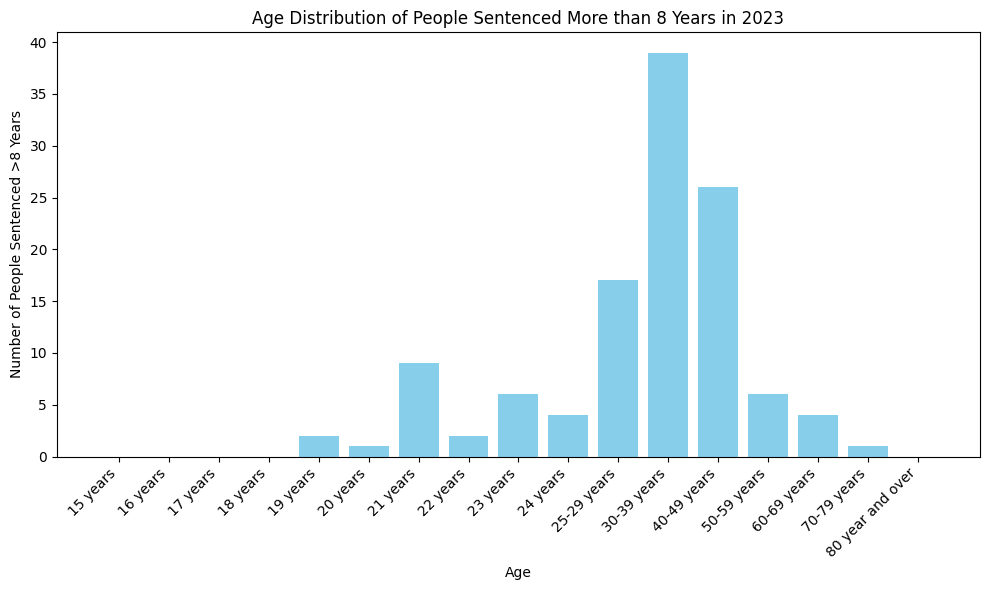

In [112]:
# Read the CSV file into a DataFrame
df = pd.read_csv("../guilty pers/age_lengthOfSent.csv", sep=";")

# Filter out rows where the sentence length is more than 8 years
df_more_than_8_years = df[df["length"].isin([">8 - 12 years", ">12 year -", "Imprisonment for life"])& (df["age"] != "Age, total")]

# Aggregate the total number of people sentenced more than 8 years by age
age_distribution = df_more_than_8_years.groupby("age")["2023"].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_distribution["age"], age_distribution["2023"], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of People Sentenced >8 Years')
plt.title('Age Distribution of People Sentenced More than 8 Years in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


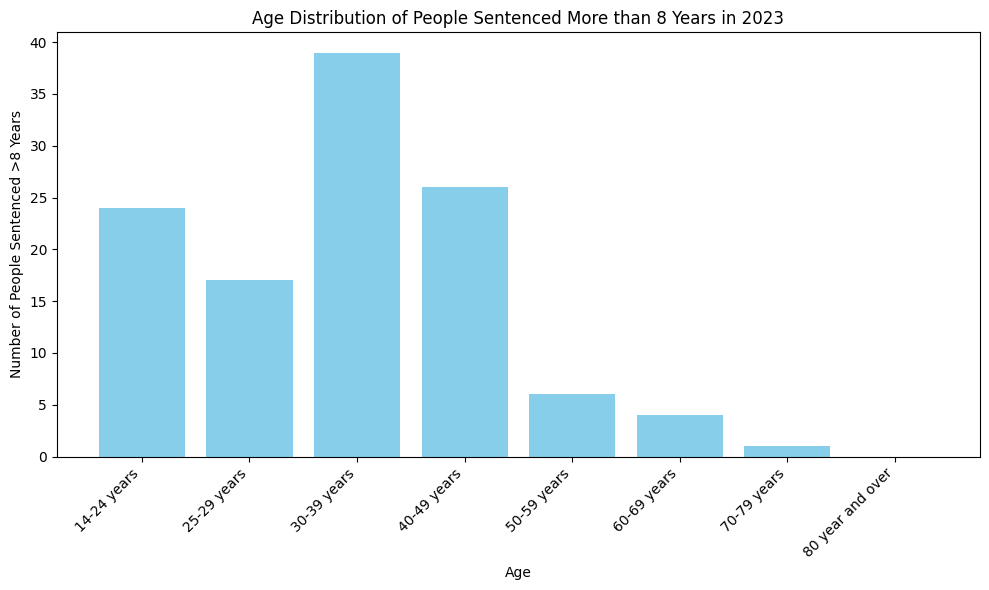

In [113]:

# Read the CSV file into a DataFrame
df = pd.read_csv("../guilty pers/age_lengthOfSent.csv", sep=";")

# Filter out rows where the sentence length is more than 8 years and age category is not "Age, total"
df_more_than_8_years = df[(df["length"].isin([">8 - 12 years", ">12 year -", "Imprisonment for life"])) & (df["age"] != "Age, total")]

# Combine age groups 14-24 into one category
age_14_to_24 = df_more_than_8_years[df_more_than_8_years["age"].isin(["15 years", "16 years", "17 years", "18 years", "19 years", "20 years", "21 years", "22 years", "23 years", "24 years"])].sum()

# Aggregate the total number of people sentenced more than 8 years by age
age_distribution = df_more_than_8_years.groupby("age")["2023"].sum().reset_index()

# Drop the individual age groups 14-24
age_distribution = age_distribution[~age_distribution["age"].isin(["15 years", "16 years", "17 years", "18 years", "19 years", "20 years", "21 years", "22 years", "23 years", "24 years"])]

# Append the combined age group 14-24 to the DataFrame and move it to the first row
age_distribution = pd.concat([pd.DataFrame({"age": ["14-24 years"], "2023": [age_14_to_24["2023"]]}), age_distribution], ignore_index=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_distribution["age"], age_distribution["2023"], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of People Sentenced >8 Years')
plt.title('Age Distribution of People Sentenced More than 8 Years in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


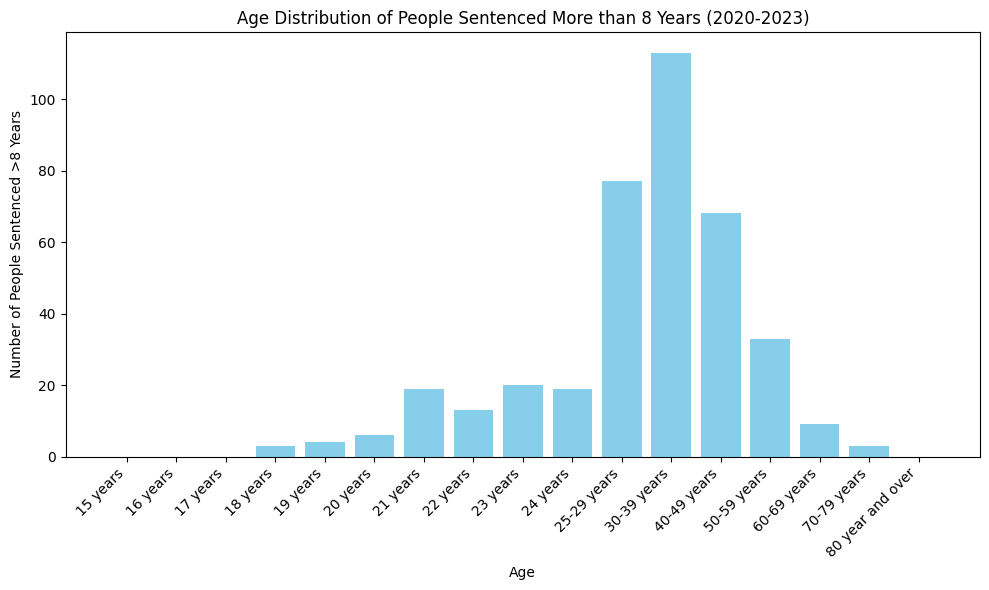

In [114]:
# Filter out rows where the sentence length is more than 8 years and age category is not "Age, total"
df_more_than_8_years = df[(df["length"].isin([">8 - 12 years", ">12 year -", "Imprisonment for life"])) & (df["age"] != "Age, total")]


# Aggregate the total number of people sentenced more than 8 years by age and across years
age_distribution = df_more_than_8_years.groupby("age")[["2020", "2021", "2022", "2023"]].sum().reset_index()


# Sum up the total for each age group
age_distribution["Total"] = age_distribution[["2020", "2021", "2022", "2023"]].sum(axis=1)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_distribution["age"], age_distribution["Total"], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of People Sentenced >8 Years')
plt.title('Age Distribution of People Sentenced More than 8 Years (2020-2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

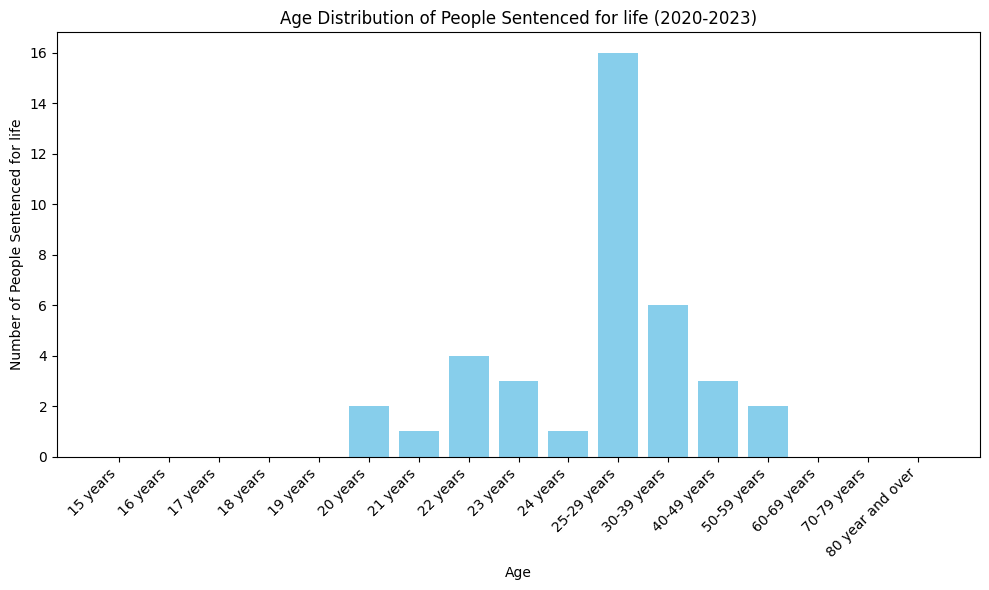

In [115]:
# Filter out rows where the sentence length is more than 8 years and age category is not "Age, total"
df_more_than_8_years = df[(df["length"].isin(["Imprisonment for life"])) & (df["age"] != "Age, total")]


# Aggregate the total number of people sentenced more than 8 years by age and across years
age_distribution = df_more_than_8_years.groupby("age")[["2020", "2021", "2022", "2023"]].sum().reset_index()


# Sum up the total for each age group
age_distribution["Total"] = age_distribution[["2020", "2021", "2022", "2023"]].sum(axis=1)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_distribution["age"], age_distribution["Total"], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of People Sentenced for life')
plt.title('Age Distribution of People Sentenced for life (2020-2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

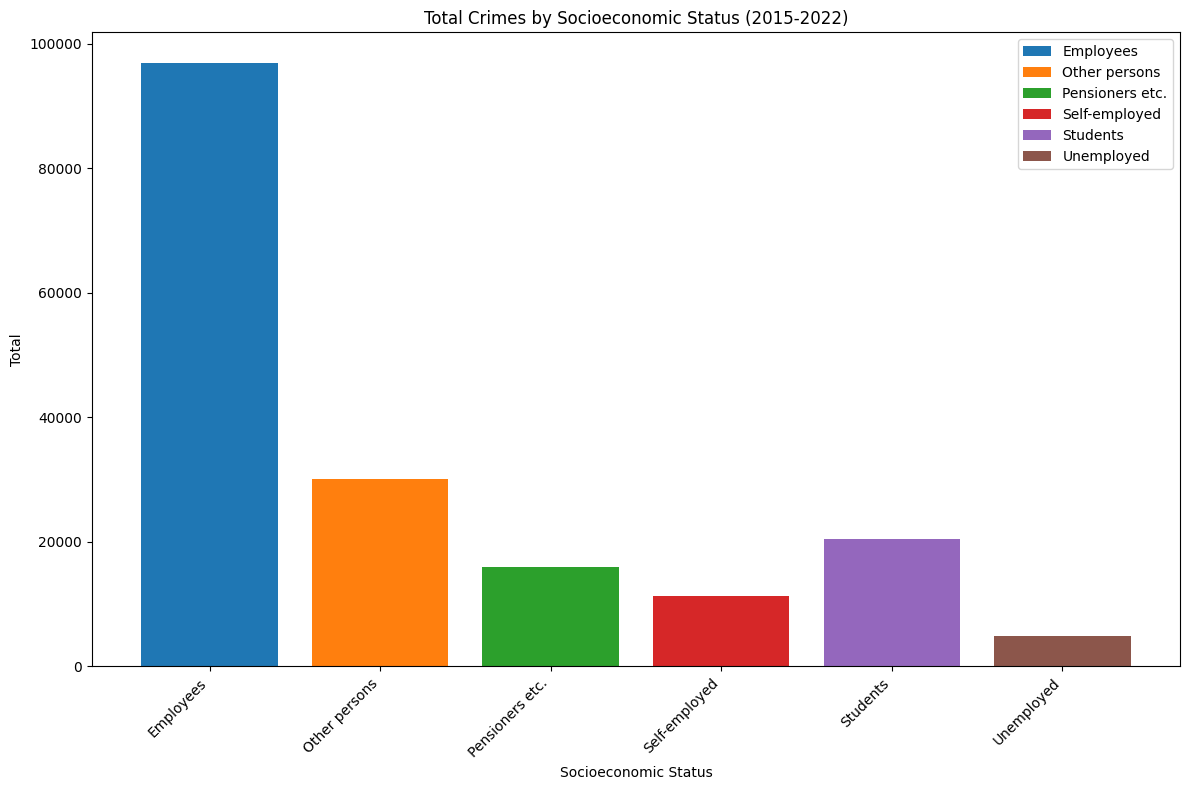

In [116]:
# Read the CSV file into a DataFrame
df = pd.read_csv("../guilty pers/sex_age_socialStatus_15_22.csv", sep=";")

# Filter out rows where the age category is "Age, total"
df = df[df["age"] == "Age, total"]

# Exclude rows where the socioeconomic status is "Total" or "Not stated"
df = df[~df["SOCIOECONOMIC STATUS"].isin(["Total", "Not stated"])]

# Group by socioeconomic status and sum up the values from 2015 to 2022
df_summed = df.groupby("SOCIOECONOMIC STATUS")[["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]].sum().reset_index()

# Create a bar plot for each socioeconomic status
plt.figure(figsize=(12, 8))
for index, row in df_summed.iterrows():
    plt.bar(row["SOCIOECONOMIC STATUS"], row[["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]], label=row["SOCIOECONOMIC STATUS"])

plt.xlabel('Socioeconomic Status')
plt.ylabel('Total')
plt.title('Total Crimes by Socioeconomic Status (2015-2022)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [124]:

# Load the data
df = pd.read_csv("../guilty pers/sex_age_socialStatus_15_22.csv", sep=";")

# Filter for the year 2022 and 'Age, total'
df_2022 = df[(df['age'] == "Age, total") & (~df['SOCIOECONOMIC STATUS'].isin(["Total", "Not stated"]))]

# Separate the data by gender
df_men = df_2022[df_2022['sex'] == 'Men']
df_women = df_2022[df_2022['sex'] == 'Women']

# Normalize the data by the sum of each group
df_men['2022'] /= df_men['2022'].sum()
df_women['2022'] /= df_women['2022'].sum()

# Prepare data for Bokeh
categories = df_men['SOCIOECONOMIC STATUS'].tolist()
men_values = df_men['2022'].tolist()
women_values = df_women['2022'].tolist()

data = {
    'categories': categories,
    'Men': men_values,
    'Women': women_values,
    'Men_formatted': [f"{x:.2%}" for x in men_values],
    'Women_formatted': [f"{x:.2%}" for x in women_values]
}

source = ColumnDataSource(data=data)

# Initialize Bokeh plot
p = figure(x_range=categories, title="Proportion of Socioeconomic Statuses by Criminals in 2022",
           toolbar_location=None, tools="", height=400, width=800)

# Add hover tool
hover = HoverTool(tooltips=[
    ("Status", "@categories"),
    ("Men", "@Men_formatted"),
    ("Women", "@Women_formatted")
])
p.add_tools(hover)

# Plot bars
p.vbar(x=dodge('categories', -0.15, range=p.x_range), top='Men', width=0.3, source=source, color="blue", legend_label="Men")
p.vbar(x=dodge('categories',  0.15, range=p.x_range), top='Women', width=0.3, source=source, color="red", legend_label="Women")

# Styling
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = 1

output_file("socioeconomic_status_criminals.html")

# Show the plot in the notebook
output_notebook()
show(p)

# Save the plot to the file
save(p)

/var/folders/rl/hhtkkwbd7m9g_6wtsrq_zrb80000gn/T/ipykernel_20915/3839336063.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rl/hhtkkwbd7m9g_6wtsrq_zrb80000gn/T/ipykernel_20915/3839336063.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Loading BokehJS ...

'/Users/thorirlarusson/Desktop/Önn_2/Social data analysis and visualization/socialdata_project/Notebook/socioeconomic_status_criminals.html'

Lets now do world map using folium

In [126]:
# Load the crime data
data_crime = pd.read_csv('../crimes/countries_tot_crime.csv', sep=';')

# Remove the "Total" row if present
data_crime = data_crime[data_crime['country'] != 'Total']

In [127]:
data = "../residents/count_pop_10_22.csv"

# Try specifying the delimiter if it's not a comma
try:
    df = pd.read_csv(data, delimiter=';')  # Change delimiter if necessary
except pd.errors.ParserError:
    print("Error parsing the file - trying different settings")
    df = pd.read_csv(data, delimiter=';', error_bad_lines=False)  # Skip problematic lines

# Filter out rows where either "2010" or "2024" is zero
df_filtered = df[(df["2014"] != 0) & (df["2024"] != 0)]

# Calculate the percentage change over the last 10 years
df_filtered["percentage_change"] = ((df_filtered["2024"] - df_filtered["2021"]) / df_filtered["2021"]) * 100

# Sort the DataFrame by the percentage change
sorted_percentage_change = df_filtered.sort_values(by="2024", ascending=False)

sorted_percentage_change = sorted_percentage_change[0:20]
sorted_percentage_change


/var/folders/rl/hhtkkwbd7m9g_6wtsrq_zrb80000gn/T/ipykernel_20915/1528426589.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country     2010     2011     2012     2013     2014  \
0                   Denmark  5033227  5042685  5048303  5053579  5056810   
34                   Poland    25793    26938    28402    30245    32366   
51                  Germany    33779    34096    34259    34451    34584   
52                  Ukraine     6202     6077     6189     6408     6806   
36                  Romania     6169     7961    10345    13057    15869   
50                   Turkey    32176    32366    32245    32066    32177   
213                   Syria     2024     2423     3059     4031     5812   
47                   Sweden    20599    20709    20870    21087    21520   
46           United Kingdom    16214    16582    16835    17307    17731   
184                    Iraq    21256    21259    21119    21074    21004   
33                   Norway    18534    18661    18892    18957    19085   
185                    Iran    11984    12363    12756    13164    13952   
181                   India     7931     8367     8778     8960     9401   
2                 Greenland    14537    14687    14877    15331    15521   
117                     USA    10688    11042    11753    11536    11877   
7    Bosnia and Herzegovina    18003    17858    17651    17474    17383   
190                   China    10368    10594    10566    10877    11491   
216                Thailand    10266    10975    11251    11551    12093   
205                Pakistan    11001    11571    11920    12166    12729   
167             Afghanistan     9855    10420    10993    11435    11937   

        2015     2016     2017     2018     2019     2020     2021     2022  \
0    5062994  5069632  5079788  5089851  5097500  5106209  5118385  5127118   
34     34867    37414    39400    40916    41806    41851    42176    44523   
51     34595    35126    35660    35979    36607    37045    37480    39153   
52      7528     8125     8750     9910    11246    12175    12442    13509   
36     18906    22037    24422    26393    28592    29474    30286    34065   
50     32156    32300    32448    32757    32931    32959    33081    33380   
213    11584    24117    33530    35316    35692    35339    35432    35094   
47     21994    22443    22854    23473    23916    24283    24754    25299   
46     18060    18662    19536    20474    21138    21583    22190    22507   
184    21059    21096    21219    21504    21741    21725    21746    21785   
33     19354    19865    20187    20278    20302    20370    20409    20581   
185    14726    15416    15832    16610    16893    16998    17367    17838   
181    10092    11233    12506    13364    14440    15436    15368    16372   
2      15845    16202    16370    16470    16566    16770    16730    16801   
117    11985    13015    13227    14167    14332    13975    14174    14871   
7      17310    17214    17136    17060    16949    16767    16609    16476   
190    12091    12782    13545    13951    14379    14757    14398    14840   
216    12428    12822    13228    13681    14032    14174    14380    14713   
205    13257    13547    13761    13963    14125    14210    14212    14329   
167    12399    12605    12827    13284    13530    13578    13628    13705   

        2023     2024  percentage_change  
0    5127773  5128117           0.190138  
34     47204    48914          15.975910  
51     41943    43964          17.299893  
52     39220    41169         230.887317  
36     38059    39431          30.195470  
50     34092    34841           5.320274  
213    34655    34610          -2.319937  
47     25747    26215           5.902076  
46     22969    23378           5.353763  
184    21806    21843           0.446059  
33     20727    20831           2.067715  
185    18916    20667          19.001555  
181    18561    20240          31.702238  
2      17067    17287           3.329348  
117    15679    16320          15.140398  
7      16379    16242          -2.209645  
190    15313    15958          1

MovieWriter ffmpeg unavailable; using Pillow instead.


                   country   2010   2011   2012   2013   2014   2015   2016  \
0                   Poland  25793  26938  28402  30245  32366  34867  37414   
1                  Germany  33779  34096  34259  34451  34584  34595  35126   
2                  Ukraine   6202   6077   6189   6408   6806   7528   8125   
3                  Romania   6169   7961  10345  13057  15869  18906  22037   
4                   Turkey  32176  32366  32245  32066  32177  32156  32300   
5                    Syria   2024   2423   3059   4031   5812  11584  24117   
6                   Sweden  20599  20709  20870  21087  21520  21994  22443   
7           United Kingdom  16214  16582  16835  17307  17731  18060  18662   
8                     Iraq  21256  21259  21119  21074  21004  21059  21096   
9                   Norway  18534  18661  18892  18957  19085  19354  19865   
10                    Iran  11984  12363  12756  13164  13952  14726  15416   
11                   India   7931   8367   8778   89

ValueError: unknown file extension: .mp4

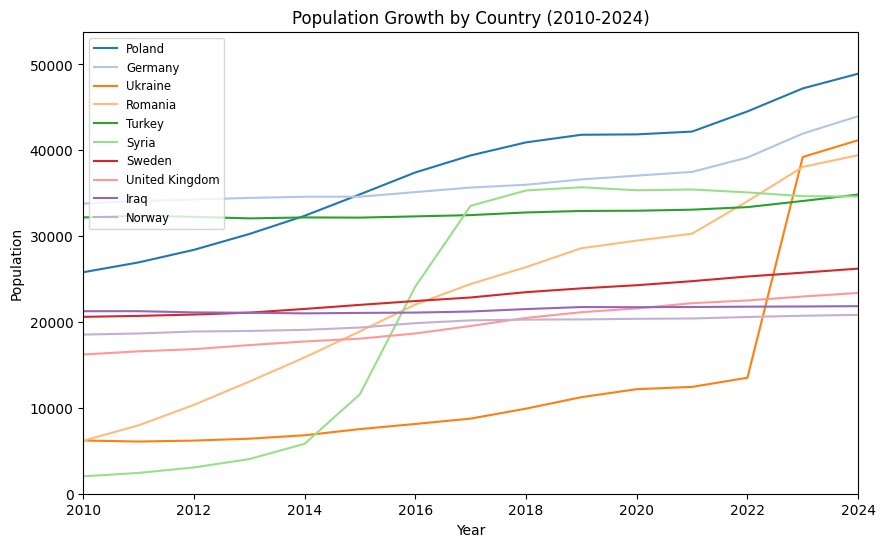

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Data
data = {
    'country': ['Poland', 'Germany', 'Ukraine', 'Romania', 'Turkey', 'Syria', 'Sweden', 'United Kingdom', 'Iraq', 'Norway', 'Iran', 'India', 'Greenland', 'USA', 'Bosnia and Herzegovina', 'China', 'Thailand', 'Pakistan', 'Afghanistan'],
    '2010': [25793, 33779, 6202, 6169, 32176, 2024, 20599, 16214, 21256, 18534, 11984, 7931, 14537, 10688, 18003, 10368, 10266, 11001, 9855],
    '2011': [26938, 34096, 6077, 7961, 32366, 2423, 20709, 16582, 21259, 18661, 12363, 8367, 14687, 11042, 17858, 10594, 10975, 11571, 10420],
    '2012': [28402, 34259, 6189, 10345, 32245, 3059, 20870, 16835, 21119, 18892, 12756, 8778, 14877, 11753, 17651, 10566, 11251, 11920, 10993],
    '2013': [30245, 34451, 6408, 13057, 32066, 4031, 21087, 17307, 21074, 18957, 13164, 8960, 15331, 11536, 17474, 10877, 11551, 12166, 11435],
    '2014': [32366, 34584, 6806, 15869, 32177, 5812, 21520, 17731, 21004, 19085, 13952, 9401, 15521, 11877, 17383, 11491, 12093, 12729, 11937],
    '2015': [34867, 34595, 7528, 18906, 32156, 11584, 21994, 18060, 21059, 19354, 14726, 10092, 15845, 11985, 17310, 12091, 12428, 13257, 12399],
    '2016': [37414, 35126, 8125, 22037, 32300, 24117, 22443, 18662, 21096, 19865, 15416, 11233, 16202, 13015, 17214, 12782, 12822, 13547, 12605],
    '2017': [39400, 35660, 8750, 24422, 32448, 33530, 22854, 19536, 21219, 20187, 15832, 12506, 16370, 13227, 17136, 13545, 13228, 13761, 12827],
    '2018': [40916, 35979, 9910, 26393, 32757, 35316, 23473, 20474, 21504, 20278, 16610, 13364, 16470, 14167, 17060, 13951, 13681, 13963, 13284],
    '2019': [41806, 36607, 11246, 28592, 32931, 35692, 23916, 21138, 21741, 20302, 16893, 14440, 16566, 14332, 16949, 14379, 14032, 14125, 13530],
    '2020': [41851, 37045, 12175, 29474, 32959, 35339, 24283, 21583, 21725, 20370, 16998, 15436, 16770, 13975, 16767, 14757, 14174, 14210, 13578],
    '2021': [42176, 37480, 12442, 30286, 33081, 35432, 24754, 22190, 21746, 20409, 17367, 15368, 16730, 14174, 16609, 14398, 14380, 14212, 13628],
    '2022': [44523, 39153, 13509, 34065, 33380, 35094, 25299, 22507, 21785, 20581, 17838, 16372, 16801, 14871, 16476, 14840, 14713, 14329, 13705],
    '2023': [47204, 41943, 39220, 38059, 34092, 34655, 25747, 22969, 21806, 20727, 18916, 18561, 17067, 15679, 16379, 15313, 14948, 14458, 14320],
    '2024': [48914, 43964, 41169, 39431, 34841, 34610, 26215, 23378, 21843, 20831, 20667, 20240, 17287, 16320, 16242, 15958, 15290, 14826, 14365],
    'percentage_change': [15.975910, 17.299893, 230.887317, 30.195470, 5.320274, -2.319937, 5.902076, 5.353763, 0.446059, 2.067715, 19.001555, 31.702238, 3.329348, 15.140398, -2.209645, 10.834838, 6.328234, 4.320293, 5.407984]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)
print(df)
df = df.head(10)

# Setting up the plot with adjusted figure size and colormap
fig, ax = plt.subplots(figsize=(10, 6))  # Width, Height in inches
#colors = plt.cm.cividis(np.linspace(0, 1, len(df)))  # Using 'cividis' colormap
# Using 'magma' colormap for a darker, yet vibrant color scheme
#colors = plt.cm.magma(np.linspace(0, 1, len(df)))
# Using 'plasma' colormap for a bright, fluorescent-like color range
#colors = plt.cm.plasma(np.linspace(0, 1, len(df)))
# Using 'Set3' colormap for distinct categorical colors
#colors = plt.cm.Set3(np.linspace(0, 1, len(df)))
# Using 'tab20' colormap to ensure distinct colors for up to 20 different lines
colors = plt.cm.tab20(np.arange(len(df)))




lines = []
for index, row in df.iterrows():
    line, = ax.plot([], [], color=colors[index], label=row['country'])
    lines.append(line)

def init():
    ax.set_xlim(2010, 2024)
    ax.set_ylim(0, max(df.max()[1:-1]) * 1.1)  # Adjust y limit based on max value, ignoring the last 'percentage_change' column
    ax.legend(loc='upper left', fontsize='small')  # Add a legend with smaller font
    return lines

def update(frame):
    for line, (index, row) in zip(lines, df.iterrows()):
        line.set_data(range(2010, 2011 + frame), row['2010':str(2010 + frame)])
    return lines

ani = FuncAnimation(fig, update, frames=range(15), init_func=init, blit=True)
plt.title('Population Growth by Country (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Population')

# Save the animation with increased DPI for better quality
ani.save('population_growth_by_country_cividis.mp4', writer='ffmpeg', fps=1, dpi=300)

plt.show()

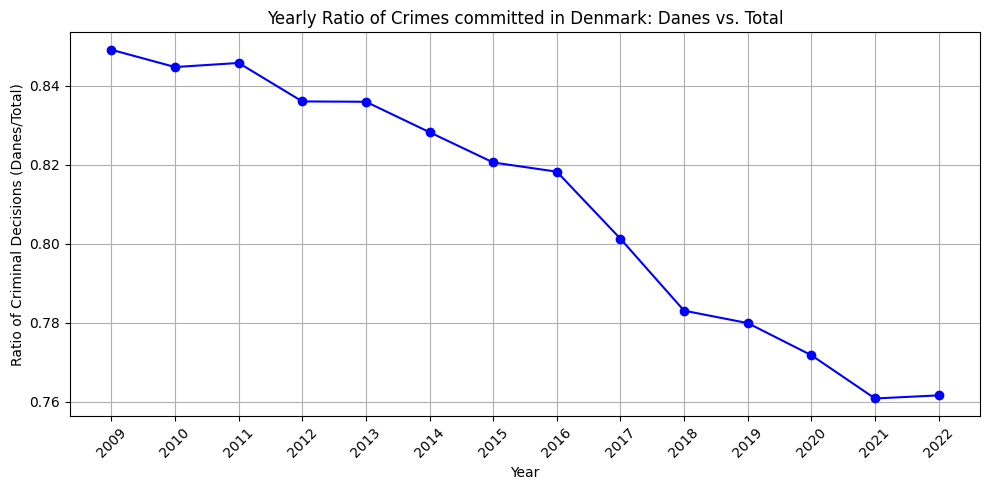

In [132]:
# Load your data
df = pd.read_csv('../guilty pers/country_offence_09_22.csv', delimiter=';')

# Filter rows for the specific offence
total_decisions = df[df['offences'] == 'Criminal decisions total']

# Assuming you have a row for 'Denmark' and 'Total', we filter those
total_row = total_decisions[total_decisions['country'] == 'Total']
denmark_row = total_decisions[total_decisions['country'] == 'Denmark']

# Extract the years as columns, convert to numeric as needed
years = total_decisions.columns[2:]  # Adjust based on your data structure

# Calculate the ratio of 'Denmark' to 'Total' for each year
ratios = denmark_row[years].values.flatten() / total_row[years].values.flatten()

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(years, ratios, marker='o', linestyle='-', color='b')
plt.title('Yearly Ratio of Crimes committed in Denmark: Danes vs. Total')
plt.xlabel('Year')
plt.ylabel('Ratio of Criminal Decisions (Danes/Total)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotates the x-axis labels for better visibility
plt.tight_layout()
plt.show()


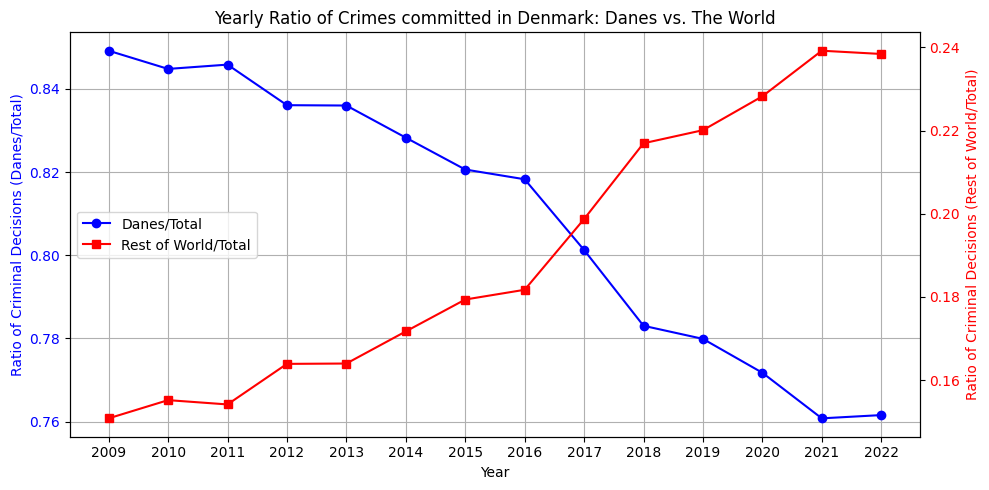

In [133]:
# Load your data
df = pd.read_csv('../guilty pers/country_offence_09_22.csv', delimiter=';')

# Filter rows for the specific offence
total_decisions = df[df['offences'] == 'Criminal decisions total']

# Filter rows for 'Denmark' and 'Total'
total_row = total_decisions[total_decisions['country'] == 'Total']
denmark_row = total_decisions[total_decisions['country'] == 'Denmark']

# Extract the years as columns, convert to numeric as needed
years = total_decisions.columns[2:]  # Adjust based on your data structure

# Calculate the ratio of 'Denmark' to 'Total' for each year
ratios_denmark = denmark_row[years].values.flatten() / total_row[years].values.flatten()
ratios_other = 1 - ratios_denmark  # Calculate the complementary ratio

# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Denmark ratio
ax1.plot(years, ratios_denmark, marker='o', linestyle='-', color='b', label='Danes/Total')
ax1.set_xlabel('Year')
ax1.set_ylabel('Ratio of Criminal Decisions (Danes/Total)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(years, ratios_other, marker='s', linestyle='-', color='r', label='Rest of World/Total')
ax2.set_ylabel('Ratio of Criminal Decisions (Rest of World/Total)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and x-axis ticks
plt.title('Yearly Ratio of Crimes committed in Denmark: Danes vs. The World')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better visibility

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center left')

plt.tight_layout()
plt.show()


       country     2014     2015     2016     2017     2018  2019      2020  \
1      Andorra        1        2        2        4        6     1  1.000000   
2      Ukraine     6806     7528     8125     8750     9910     1  1.082607   
4      Moldova      438      485      572      686      850     1  1.225207   
5    Argentina     1198     1269     1468     1754     1884     1  1.572532   
7      Albania      322      349      386      424      488     1  1.087344   
8        Nepal     2238     2666     3273     4036     4420     1  0.985122   
9   Bangladesh     1172     1331     1488     1660     1776     1  1.035903   
10     Denmark  5056810  5062994  5069632  5079788  5089851     1  1.001708   

        2021      2022      2023      2024  
1   1.166667  1.833333  2.000000  2.333333  
2   1.106349  1.201227  3.487462  3.660768  
4   1.396694  1.751033  2.138430  2.368802  
5   1.598283  1.702146  2.209442  2.529185  
7   1.144385  1.263815  1.611408  2.053476  
8   0.970243  1.12

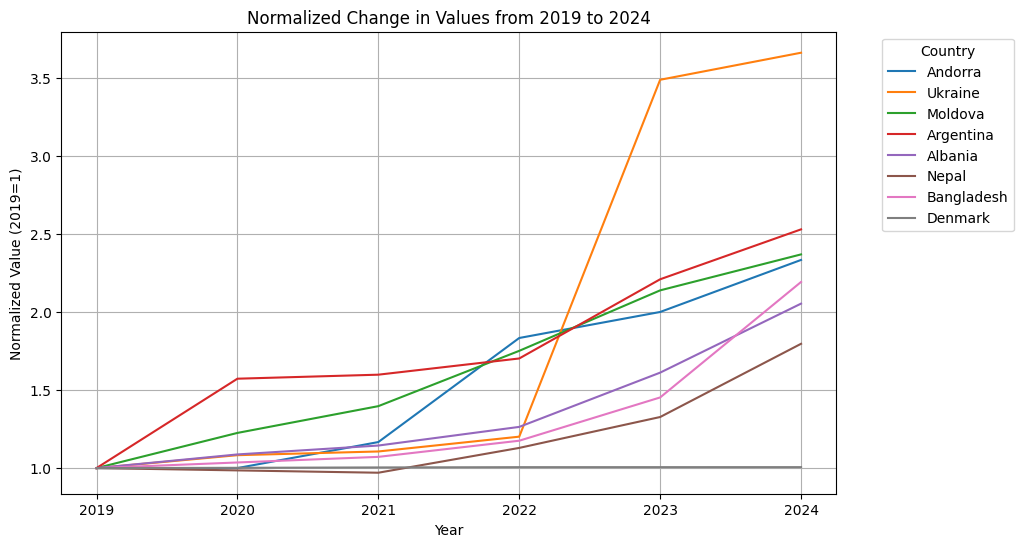

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame with the provided data
data = {
    'country': ['Eritrea', 'Andorra', 'Ukraine', 'Syria', 'Moldova', 'Argentina', 'Croatia', 'Albania', 'Nepal', 'Bangladesh', 'Denmark'],
    '2014': [386, 1, 6806, 5812, 438, 1198, 857, 322, 2238, 1172, 5056810],
    '2015': [622, 2, 7528, 11584, 485, 1269, 1107, 349, 2666, 1331, 5062994],
    '2016': [3399, 2, 8125, 24117, 572, 1468, 1428, 386, 3273, 1488, 5069632],
    '2017': [4317, 4, 8750, 33530, 686, 1754, 1715, 424, 4036, 1660, 5079788],
    '2018': [5199, 6, 9910, 35316, 850, 1884, 1940, 488, 4420, 1776, 5089851],
    '2019': [5524, 6, 11246, 35692, 968, 2330, 2215, 561, 4436, 1894, 5097500],
    '2020': [5742, 6, 12175, 35339, 1186, 3664, 2428, 610, 4370, 1962, 5106209],
    '2021': [5867, 7, 12442, 35432, 1352, 3724, 2542, 642, 4304, 2030, 5118385],
    '2022': [5931, 11, 13509, 35094, 1695, 3966, 2873, 709, 5009, 2226, 5127118],
    '2023': [5936, 12, 39220, 34655, 2070, 5148, 3066, 904, 5887, 2751, 5127773],
    '2024': [5948, 14, 41169, 34610, 2293, 5893, 3115, 1152, 7968, 4152, 5128117]
}


df = pd.DataFrame(data)
df = df[~df['country'].isin(['Syria', 'Croatia', 'Eritrea'])]


# Normalizing data to 2014 values
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
for year in years[6:]:
    df[year] = df[year] / df['2019']

# Set '2014' year as baseline 1
df['2019'] = 1
print(df)
# Plotting the normalized data
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(years[5:], row[years[5:]], label=row['country'])

plt.title('Normalized Change in Values from 2019 to 2024')
plt.xlabel('Year')
plt.ylabel('Normalized Value (2019=1)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [136]:
# Merge the two tables on the "country" column
merged_table = pd.merge(result_table, data_crime, on="country")
merged_table['crime_resi_ratio'] = merged_table['crimes'] / merged_table['2024']

# Sort the DataFrame by the "crime_resi_ratio" column in descending order
sorted_table = merged_table.sort_values(by='crime_resi_ratio', ascending=False)

# Display the merged table
print(sorted_table[:50])
top_10_co = sorted_table[:5]

                         country   2024  crimes  crime_resi_ratio
61                       Lebanon  13407    3252          0.242560
60                        Kuwait   1508     319          0.211538
58                        Jordan   1391     250          0.179727
40                       Somalia  10536    1688          0.160213
10                    Yugoslavia   7064    1045          0.147933
28                        Turkey  34841    4847          0.139118
43                       Tunisia   1076     146          0.135688
38                       Morocco   6132     830          0.135356
63                      Pakistan  14826    1836          0.123837
11  Yugoslavia, Federal Republic    830     101          0.121687
54                          Iraq  21843    2485          0.113766
22         Serbia and Montenegro    528      51          0.096591
33                       Algeria   1045      94          0.089952
34                         Egypt   2162     170          0.078631
50        

In [137]:
# Filter the DataFrame to include only the top 5 countries and specific countries
filtered_table = sorted_table.head(5).append(sorted_table[sorted_table['country'].isin(['Poland', 'Romania', 'Turkey', 'Syria', 'Iraq', 'Denmark'])])

# Print the filtered table
print(filtered_table)

AttributeError: 'DataFrame' object has no attribute 'append'

In [138]:
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(filtered_table['country'], filtered_table['crime_resi_ratio'], color='skyblue')
plt.xlabel('Crime-Resident Ratio')
plt.ylabel('Country')
plt.title('Crime-Resident Ratio by Country (2024)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest ratio at the top
plt.show()


NameError: name 'filtered_table' is not defined

<Figure size 1000x800 with 0 Axes>

In [139]:
# Load the data from a CSV file
# Ensure to replace 'path_to_your_file.csv' with the actual path to your data file
data = pd.read_csv('../guilty pers/country_offence_09_22.csv', delimiter=';')

data = data[~data['offences'].str.endswith("total")]

# Filter the data for Kuwait and Lebanon
kuwait_data = data[data['country'] == 'Kuwait']
lebanon_data = data[data['country'] == 'Lebanon']
denmark_data = data[data['country'] == 'Total']

# Select the years 2012 to 2024 for analysis
years = [str(year) for year in range(2021, 2022)]  # Generates list of years from 2012 to 2024

# Sum the data across the selected years and identify top offenses
kuwait_crimes = kuwait_data.set_index('offences')[years].sum(axis=1).sort_values(ascending=False)
lebanon_crimes = lebanon_data.set_index('offences')[years].sum(axis=1).sort_values(ascending=False)
denmark_data = denmark_data.set_index('offences')[years].sum(axis=1).sort_values(ascending=False)

# Display the top offenses for Kuwait
print("Top Crimes in denmark_data:")
print(denmark_data.head(10))  # Show top 5 offenses


Top Crimes in denmark_data:
offences
Road Traffic Act, other                   109063
Other special laws.                        13713
Euphoriants Act                            10483
Shoplifting, etc.                           6342
Drunken driving                             5554
Health and social security legislation      3945
Firearms Act                                3261
Vehicle defect offences                     3216
Common assault                              2485
Income Tax And Fiscal Acts                  2048
dtype: int64


/var/folders/rl/hhtkkwbd7m9g_6wtsrq_zrb80000gn/T/ipykernel_20915/3729137307.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/rl/hhtkkwbd7m9g_6wtsrq_zrb80000gn/T/ipykernel_20915/3729137307.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




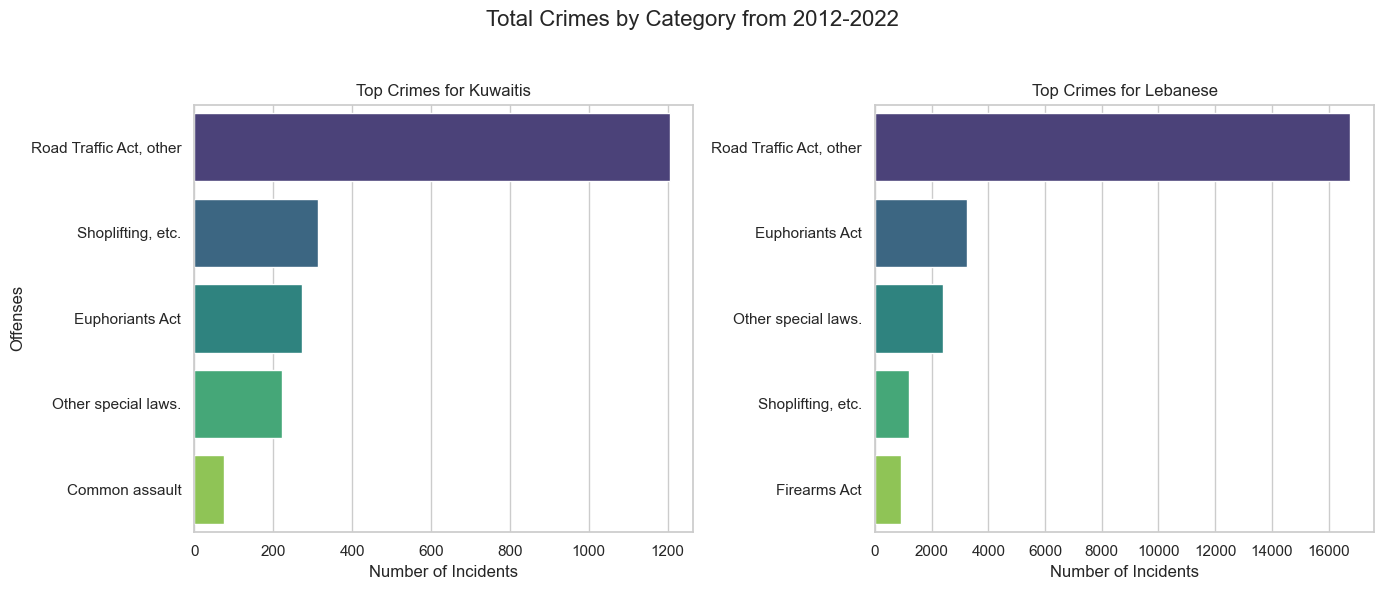

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data from your output
kuwait_crimes = pd.Series({
    'Road Traffic Act, other': 1205,
    'Shoplifting, etc.': 313,
    'Euphoriants Act': 274,
    'Other special laws.': 221,
    'Common assault': 74
}, name='Offenses in Kuwait')

lebanon_crimes = pd.Series({
    'Road Traffic Act, other': 16766,
    'Euphoriants Act': 3245,
    'Other special laws.': 2400,
    'Shoplifting, etc.': 1192,
    'Firearms Act': 920
}, name='Offenses in Lebanon')

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot Kuwait
sns.barplot(x=kuwait_crimes.values, y=kuwait_crimes.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top Crimes for Kuwaitis')
axes[0].set_xlabel('Number of Incidents')
axes[0].set_ylabel('Offenses')

# Plot Lebanon
sns.barplot(x=lebanon_crimes.values, y=lebanon_crimes.index, ax=axes[1], palette='viridis')
axes[1].set_title('Top Crimes for Lebanese')
axes[1].set_xlabel('Number of Incidents')
axes[1].set_ylabel('')

# Add a main title to the figure
fig.suptitle('Total Crimes by Category from 2012-2022', fontsize=16)

# Adjust layout to accommodate the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to make room for the main title

# Show the plot
plt.show()

In [141]:
# Load GeoJSON data for the countries
with open('../data/countries.geojson', 'r') as f:
    countries_geojson = json.load(f)

# Function to determine color based on crime count
def color_for_crimes(crime_count):
    try:
        crime_count = int(crime_count)
        if crime_count > 100000:
            return 'darkred'
        elif crime_count > 2000:
            return 'red'
        elif crime_count > 1000:
            return 'orange'
        elif crime_count > 500:
            return 'yellow'
        elif crime_count > 100:
            return 'lightgreen'
        elif crime_count > 10:
            return 'green'
        else:
            return 'blue'
    except (ValueError, TypeError):
        return 'lightgray'

# Function to generate tooltip content
def get_tooltip(country):
    crime_count = data_crime[data_crime['country'] == country]['crimes'].values
    crime_count = f"{crime_count[0]:,}" if len(crime_count) > 0 else 'No data'
    return f"{country}<br>Crimes: {crime_count}"

# Create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)


# Add GeoJSON overlay
folium.GeoJson(
    data=countries_geojson,
    style_function=lambda feature: {
        'fillColor': color_for_crimes(
            data_crime.loc[data_crime['country'] == feature['properties']['ADMIN'], 'crimes'].values[0]
            if feature['properties']['ADMIN'] in data_crime['country'].values and not data_crime.loc[data_crime['country'] == feature['properties']['ADMIN'], 'crimes'].empty else None
        ),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['ADMIN'],
        aliases=['Country: '],
        localize=True,
        sticky=True,
        labels=True,
        style=("background-color: white; color: #333333; font-family: Arial; font-size: 12px; padding: 10px;"),
    )
).add_to(m)

# Iterating through countries to add tooltips individually
for feature in countries_geojson['features']:
    country_name = feature['properties']['ADMIN']
    crime_value = data_crime[data_crime['country'] == country_name]['crimes'].values
    tooltip_text = f"{country_name}<br>Crimes: {'No data' if len(crime_value) == 0 else f'{int(crime_value[0]):,}'}"
    tooltip = folium.Tooltip(tooltip_text)
    folium.GeoJson(
        feature,
        style_function=lambda feature: {'fillOpacity': 0, 'weight': 0},
        tooltip=tooltip
    ).add_to(m)


# Add legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 240px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Total Crimes<br>
     &nbsp;<i style="background: darkred">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; >100.000<br>
     &nbsp;<i style="background: red">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; > 2.000<br>
     &nbsp;<i style="background: orange">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; 1.999 - 1.000<br>
     &nbsp;<i style="background: yellow">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; 999 - 500<br>
     &nbsp;<i style="background: lightgreen">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; 499 - 100<br>
     &nbsp;<i style="background: green">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; 99 - 10<br>
     &nbsp;<i style="background: blue">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; ≤10<br>
     &nbsp;<i style="background: lightgray">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; No data<br>
      </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m.save('Crime_Map.html')

<a id="genre"></a> 
# Genre 
Our project utilizes the **Magazine-style** genre for our data story. This choice is motivated by the genre's ability to weave complex data into an engaging narrative that mirrors feature stories found in magazines. This style is particularly effective for topics like crime analysis, where the integration of detailed data visualizations, in-depth text, and segmented storytelling can make complex information accessible and engaging to a diverse audience.

#### Visual Narrative Tools
We have employed several visual narrative tools categorized by [Segal and Heer](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf), selected for their ability to enhance the comprehension and engagement of our visualizations:

1. **Visual Structuring**:
   - **Consistent Visual Platform**: We've implemented a uniform style across all visualizations, including consistent color schemes and layout formats. This consistency helps in making the narrative visually coherent, reducing cognitive load, and allowing viewers to focus more on the content rather than navigating different styles.
   - **Feature Distinction**: Key data points and findings are emphasized through distinctive visual elements like bold colors or enlarged fonts, helping to draw attention to the most crucial parts of the data.

2. **Viewing and Interaction**:
   - **Filtering/Selection**: Interactive filters allow users to select specific data points, like different regions or years, to view crime statistics relevant to their interests. This tool enhances user engagement by allowing personalized interactions with the dataset.
   - **Highlighting**: Important trends and outliers in the data are highlighted using animation or distinct visual markers, which help to guide the viewer's attention effectively through the narrative.

3. **Transition Guidance**:
   - **Interactive Sliders**: These are used to explore changes over time, such as trends in crime rates over the years. Sliders give users control over the temporal aspect of the data, facilitating a dynamic exploration of how crime patterns evolve.

#### Narrative Structure Tools
The structure of our narrative is crafted to ensure that the story is coherent and logically flows from one segment to another, utilizing tools from Segal and Heer’s framework:

1. **Ordering**:
   - **Random Access**: Allows users to navigate the data story in a non-linear fashion, which is ideal for exploring complex datasets where viewers may have varying interests. This setup respects the viewer's autonomy in choosing their path through the content.

2. **Interactivity**:
   - **Hover Highlighting and Detail-on-demand**: As users hover over different elements of the visualizations, additional information is displayed. This feature enriches the user experience by providing more depth that can be accessed as needed, without cluttering the primary view.

3. **Messaging**:
   - **Captions/Annotations**: Each visualization is accompanied by clear, concise captions or annotations that explain what the viewer is seeing. This tool is crucial for ensuring that all viewers, regardless of their familiarity with the subject matter, can understand and appreciate the insights presented in the data.


<a id="visualizations"></a> 
# Visualizations
Our data story employs a variety of visualizations, each selected to best illustrate different aspects of the crime data and demographic insights in Denmark. Here’s a breakdown of each visualization type and why they are integral to our narrative:

#### Time Series Graphs
- **Usage**: We use time series graphs to display the trends in total crime over the years, as well as for specific types of crimes.
- **Justification**: Time series graphs are particularly effective in showing how crime rates have evolved over time. This visualization helps in identifying trends, such as increases or decreases in crime rates, or seasonal variations, which are crucial for understanding the dynamic nature of crime and its responses to policy changes or societal shifts.

#### Choropleth Maps
- **Usage**: Choropleth maps are employed to depict crime rates across different regions of Denmark, normalized by population.
- **Justification**: These maps provide a geographical perspective of crime distribution, highlighting regions with higher crime rates. This is essential for identifying hotspots and understanding regional disparities in crime, which can guide local policy interventions and resource allocation.

#### Bokeh Graphs
- **Usage**: We use interactive Bokeh graphs to compare crime statistics across Nordic countries.
- **Justification**: The interactive nature of Bokeh graphs allows users to engage more deeply with the data, exploring different dimensions such as crime types or specific years. This comparative analysis helps contextualize Denmark's crime rates within the broader Nordic region, offering insights into relative safety and areas of concern.

#### Folium Maps
- **Usage**: Folium maps are utilized to show the global origins of the Danish population.
- **Justification**: By mapping the country of origin of Denmark's residents, these maps offer a demographic layer to our analysis, helping to correlate crime rates with population diversity. This visualization supports discussions on how immigration patterns might influence crime statistics, providing a broader socio-economic context.

#### Time Series Graphs and Box Plots for Crimes by Origin
- **Usage**: Additional time series graphs and box plots are created to analyze the crime committed by people from different origins.
- **Justification**: These visualizations allow us to explore and present the variability and distribution of crime rates among different demographic groups. Time series show trends over time, while box plots offer insights into the statistical distribution of data, highlighting outliers and the spread of crime rates across groups. This is vital for understanding if certain demographics are more susceptible to being involved in crime, either as perpetrators or victims.


<a id="discussion"></a> 
# Discussion

#### What Went Well
Our project successfully explored the varied landscape of crime rates across Denmark and provided a comparative analysis with other Nordic countries. Initially aiming to understand regional disparities in crime rates, particularly focusing on Copenhagen, our investigation broadened to include a Nordic comparison, which enriched our findings:
- **Broader Comparative Analysis**: Although we encountered data limitations concerning specific regions like Copenhagen, this challenge prompted us to extend our analysis across the Nordic countries. This not only provided context to Denmark's crime rates but also highlighted significant contrasts, especially with Sweden's higher crime index linked to gang activities.
- **Insights on Demographic Influences**: Our exploration into how crimes correlate with different origins in Denmark unveiled intricate patterns of criminal activity associated with various demographic groups. This aspect of the analysis proved to be particularly insightful, offering a deeper understanding of the socio-economic factors influencing crime rates.

#### What is Still Missing and Areas for Improvement
Despite the successes, there are several areas where our project could be enhanced:
- **Granular Data for Copenhagen**: One of the initial setbacks was the absence of specific crime data just for Copenhagen, which could have provided more detailed insights into urban crime dynamics. The availability of such data would allow for a more focused analysis of crime patterns and preventative strategies within Denmark's capital.
- **Longitudinal and Real-time Data**: Incorporating longitudinal data could improve our understanding of long-term trends and the efficacy of law enforcement policies over time. Additionally, real-time crime data could enable a dynamic analysis, offering up-to-date insights that could be more actionable for policymakers and the public.
- **Broader Data Sources**: Expanding our data sources to include more qualitative data, such as victim or perpetrator interviews and judicial outcomes, could enrich our understanding of the criminal justice process and the societal impact of crime beyond mere statistics.

#### Reflections
- **Deepening the Investigation**: Our project's evolution from a simple comparison of regional crime rates to an in-depth analysis of demographic impacts exemplifies the iterative nature of data science. Each step in our analysis opened new avenues for exploration, demonstrating that data analysis is often a progressive discovery that can lead to unexpected but valuable insights.
- **Potential for Policy Impact**: The findings from our study, particularly those relating to demographic influences on crime, have the potential to inform more targeted and effective crime prevention strategies, tailored to the needs of specific communities.



<a id="contributions"></a> 
# Contributions
1. **Crime Rates Analysis in Denmark and Nordic Countries**:
   - Þórir: Analyzed crime rates in Denmark and compared them to other Nordic countries.

2. **Analysis of Crime Data by Origin**:
   - Sölvi: Conducted a detailed analysis of crime data based on the origin of individuals.

3. **Notebook Texts**:
   - Collaborative Effort: Both Þórir and Sölvi worked together on the notebook texts.

4. **ChatGPT**:
   - ChatGPT: Assisted with grammar, text organization, offered assistance in polishing the narrative, ensuring coherence, and refining the overall presentation.